# Visualizing CNN

In [1]:
import sys
sys.path.append('../')
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
current_working_directory = os.getcwd()

# print output to the console
print(current_working_directory)


C:\Users\ethan\git\Full_Chess_App


In [2]:
from Chess_Model.src.model.classes.cnn_dataGenerator import data_generator as cnn_data_generator
from Chess_Model.src.model.config.config import Settings

In [3]:

s = Settings()
scores_file = s.scores_file
predictions_board = s.predictions_board
test_size = s.nnTestSize
train_file = s.trainingFile


target_features = ["white mean","black mean","stalemate mean"]


train_file


'./Chess_Model/src/model/data/training.csv'

In [4]:
import os.path
os.path.isfile(train_file)

True

In [5]:
dg = cnn_data_generator(filename=scores_file,target_feature=target_features,
            test_size=test_size,
            predictions_board=predictions_board)
dg.get_shape()

Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead


[(8, 8, 50), (40,)]

In [6]:
train_dataset = dg.dataset_from_generator(
        filename=train_file)

In [35]:
dg.shape

50

In [8]:
sample = None
for data in train_dataset.take(1):  # Take one batch from the dataset
    sample=data

Index(['white advantage positions', 'black advantage positions',
       'castling positions', 'en passant positions',
       'white king check positions', 'black king check positions',
       'white knight positions', 'white bishop positions',
       'white rook positions', 'white queen positions', 'white king positions',
       'white pawn positions', 'black knight positions',
       'black bishop positions', 'black rook positions',
       'black queen positions', 'black king positions', 'black pawn positions',
       'white positions', 'black positions', 'white black positions',
       'white knight attack positions', 'white bishop attack positions',
       'white rook attack positions', 'white queen attack positions',
       'white king attack positions', 'white pawn attack positions',
       'black knight attack positions', 'black bishop attack positions',
       'black rook attack positions', 'black queen attack positions',
       'black king attack positions', 'black pawn attack 

C:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikit_learn-1.3.2-py3.11-win-amd64.egg\sklearn\base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [17]:
sample[0][0][0]

<tf.Tensor: shape=(8, 8, 50), dtype=int8, numpy=
array([[[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 1, 1],
        [0, 1, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..

In [32]:


# Assuming `sample` is a tuple of tensors with shapes [(8, 8, 50), (40,)]
# Extract the first tensor from the tuple
first_tensor = sample[0][0][0]  # This should have the shape (8, 8, 50)

# Split the first tensor along the third axis (depth) to get 50 8x8 matrices
split_matrices = tf.split(first_tensor, num_or_size_splits=50, axis=2)

# Each item in `split_matrices` is now a tensor with shape (8, 8, 1)
# If you want to remove the last dimension to get exactly 8x8 matrices,
# you can use tf.squeeze
squeezed_matrices = [tf.squeeze(matrix, axis=-1) for matrix in split_matrices]

# `squeezed_matrices` will contain 50 tensors, each with a shape of (8, 8)
squeezed_matrices_float32 = [tf.cast(matrix, tf.float32) for matrix in squeezed_matrices]

In [33]:
squeezed_matrices_float32

[<tf.Tensor: shape=(8, 8), dtype=float32, numpy=
 array([[0., 1., 1., 1., 1., 1., 1., 0.],
        [1., 0., 1., 1., 1., 1., 0., 1.],
        [0., 1., 0., 0., 1., 1., 1., 1.],
        [0., 1., 1., 0., 0., 1., 0., 1.],
        [1., 1., 1., 0., 1., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 8), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 1.],
        [0., 1., 0., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>,
 <tf.Tensor: shape=(8, 8), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0.

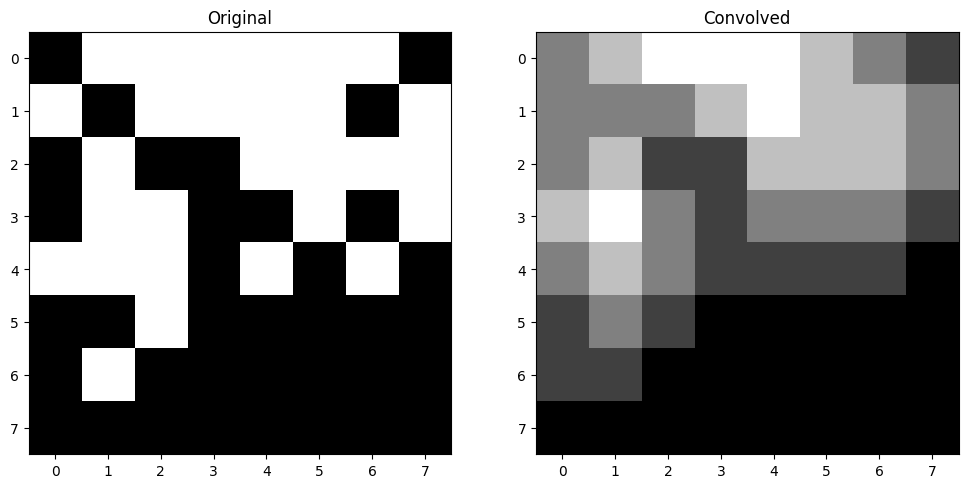

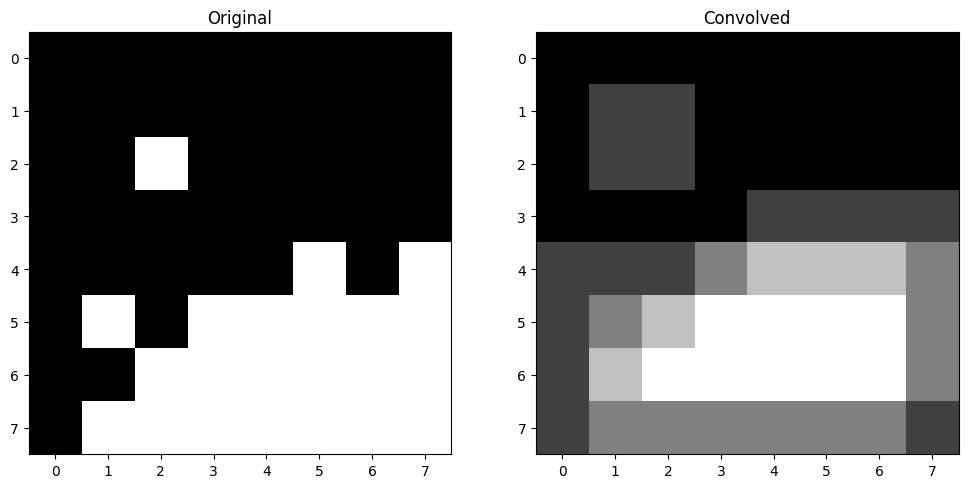

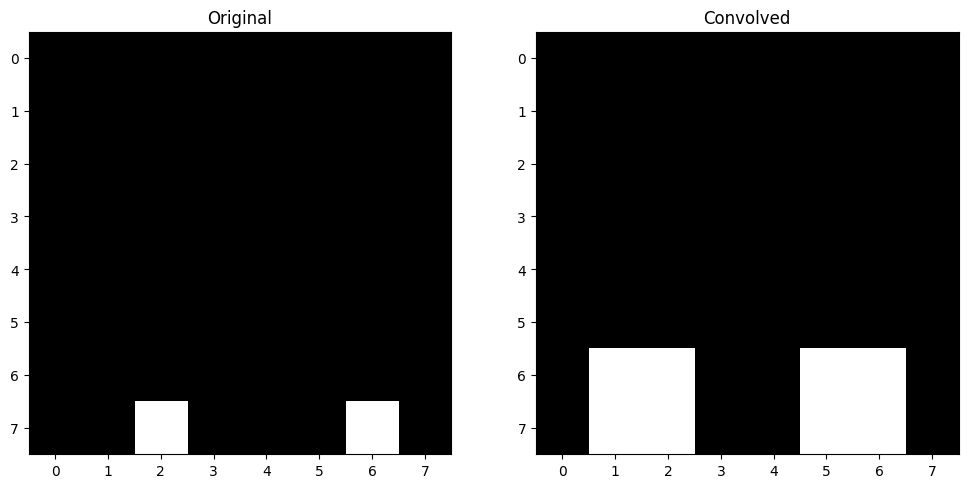

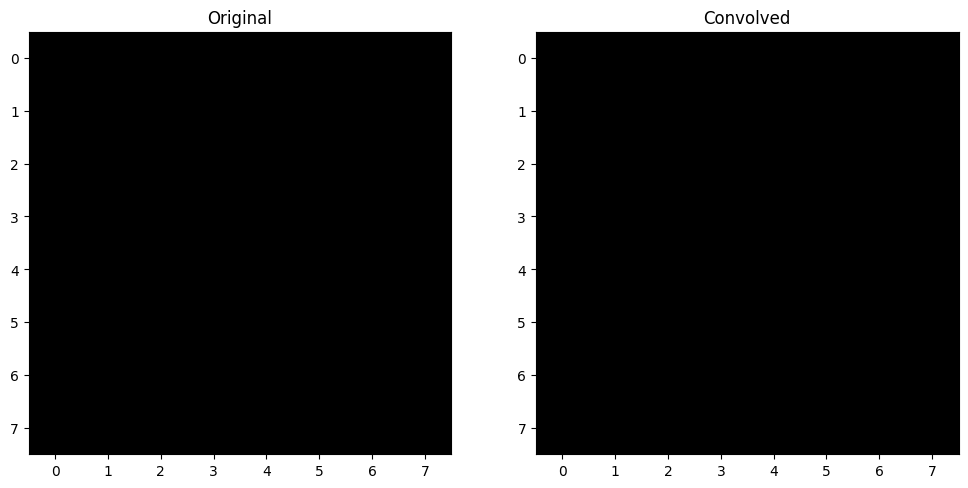

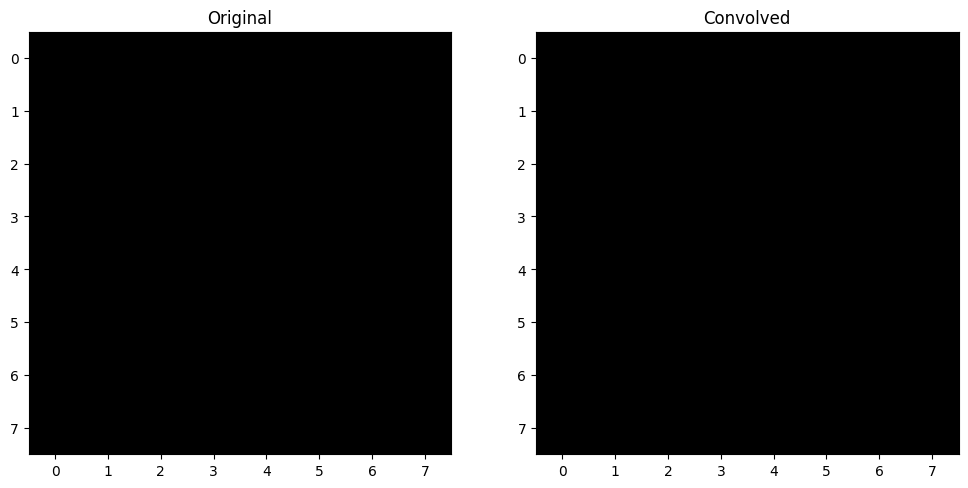

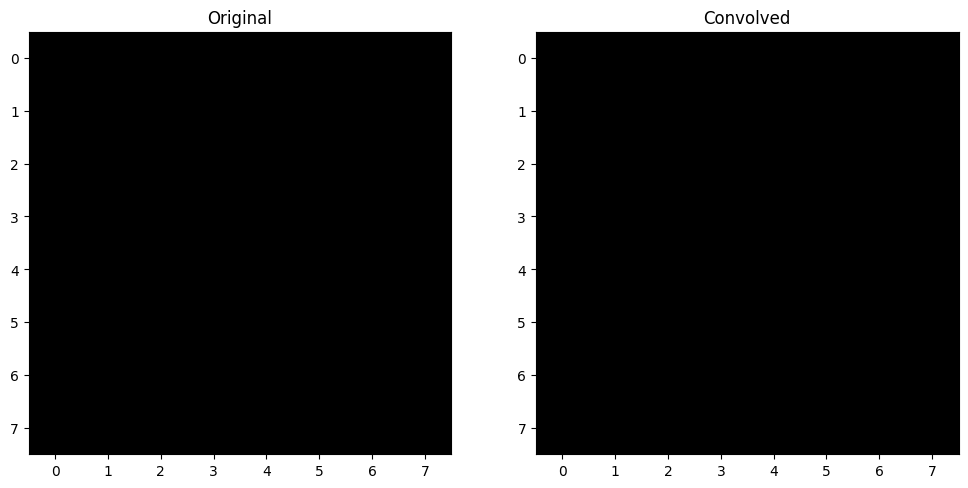

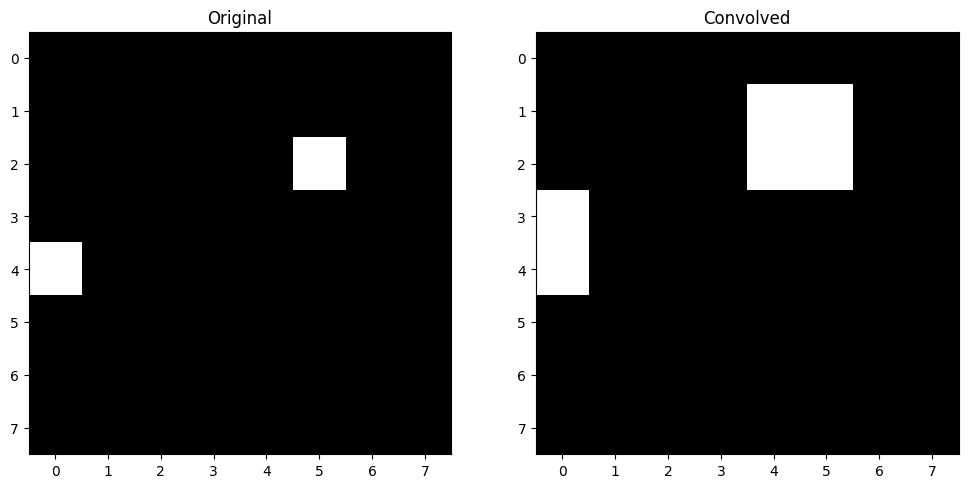

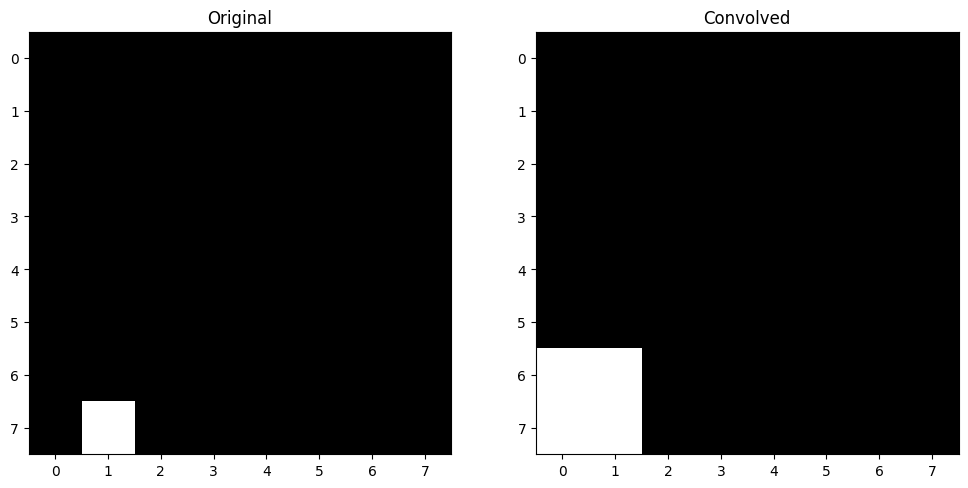

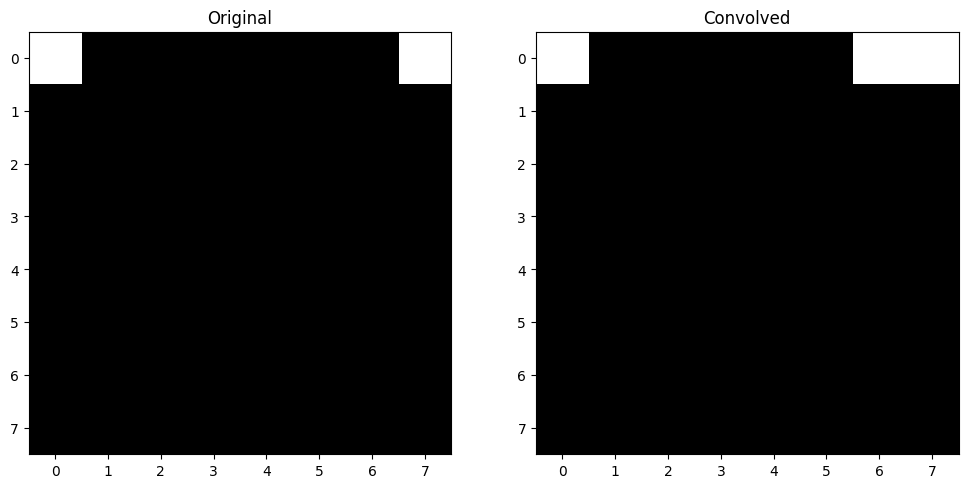

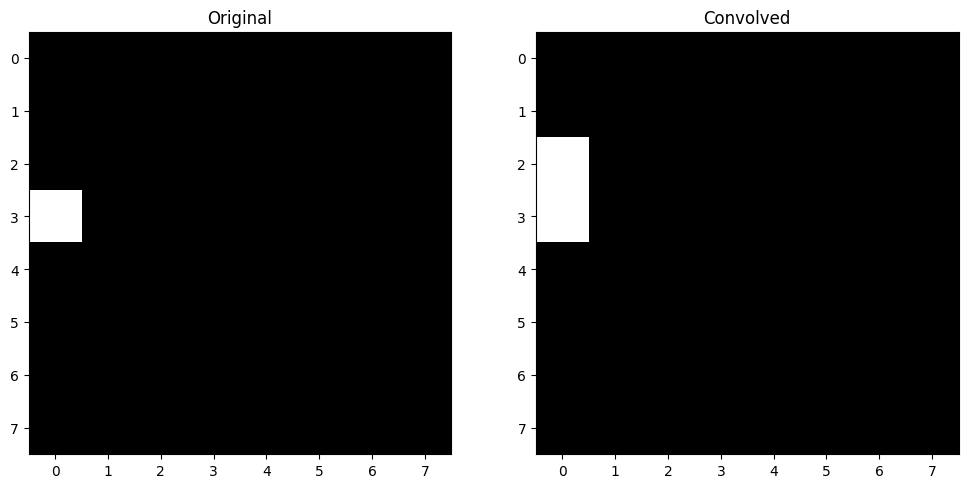

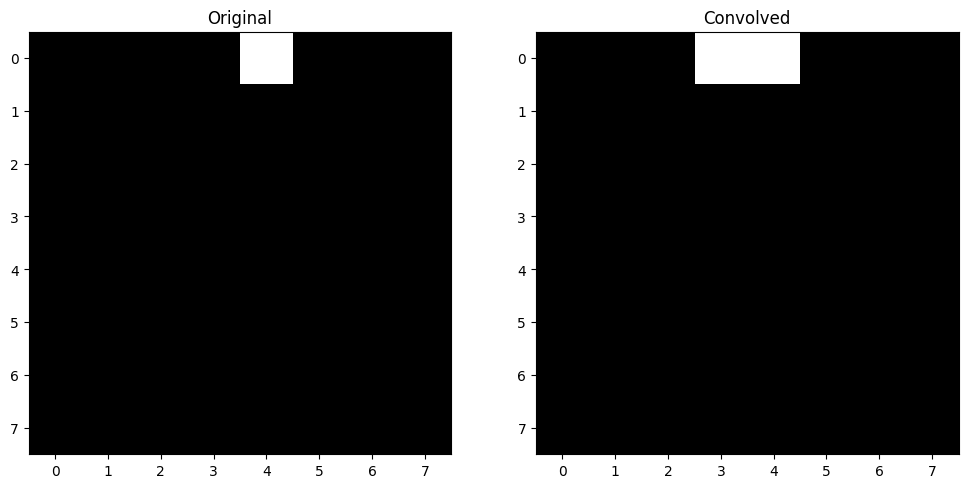

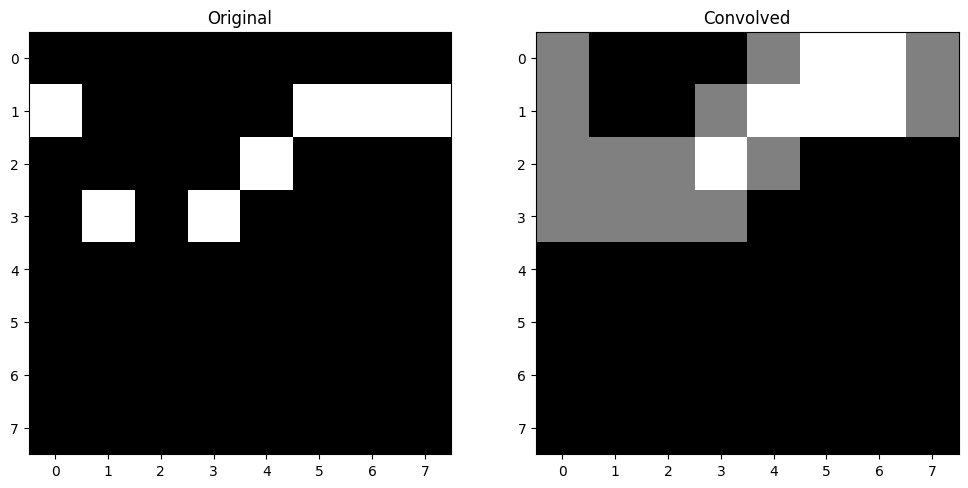

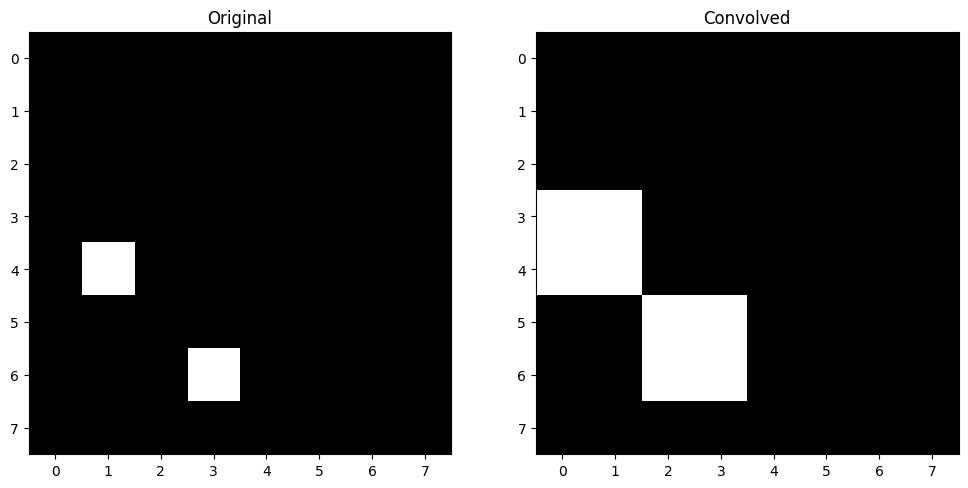

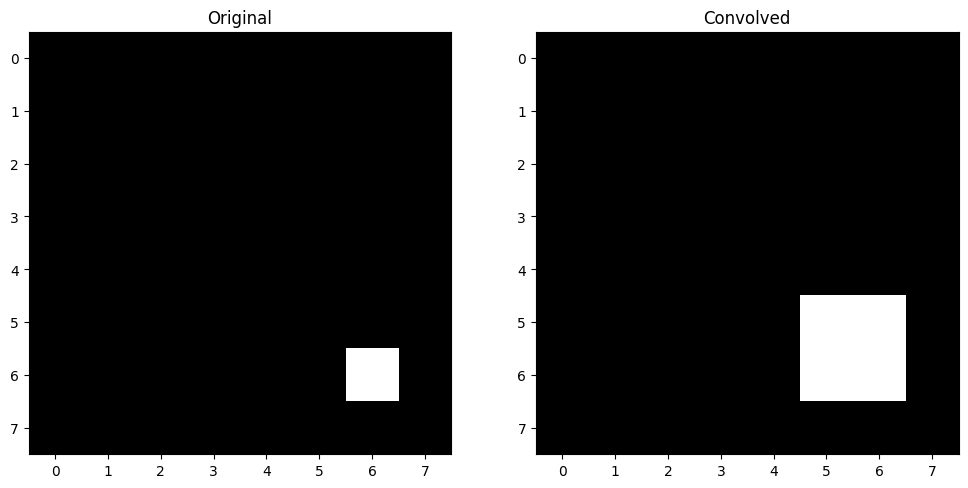

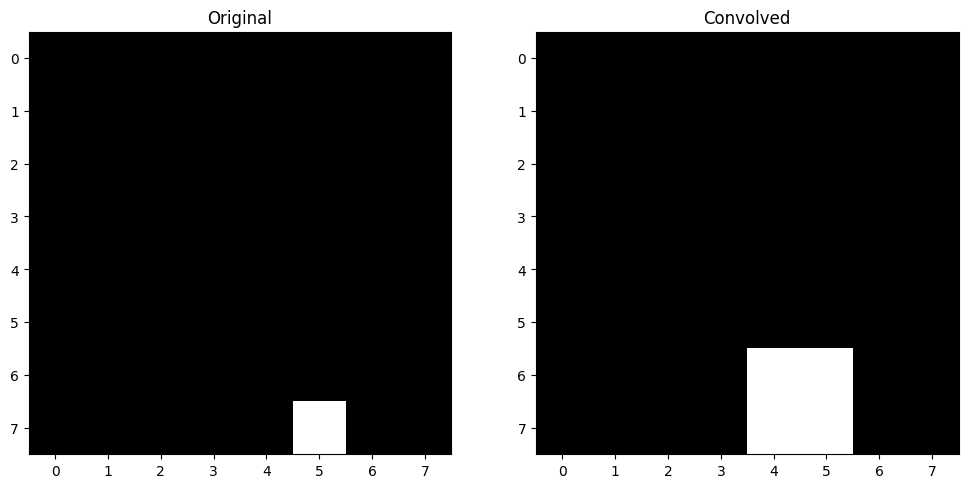

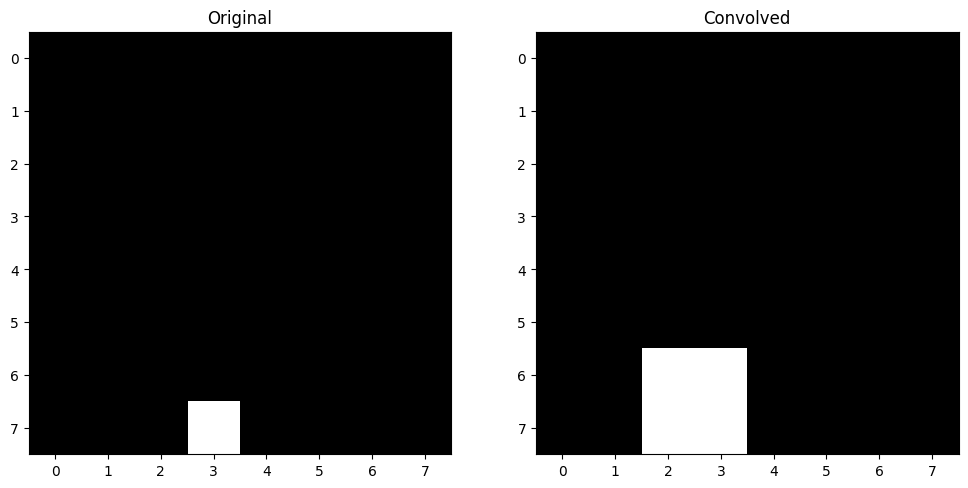

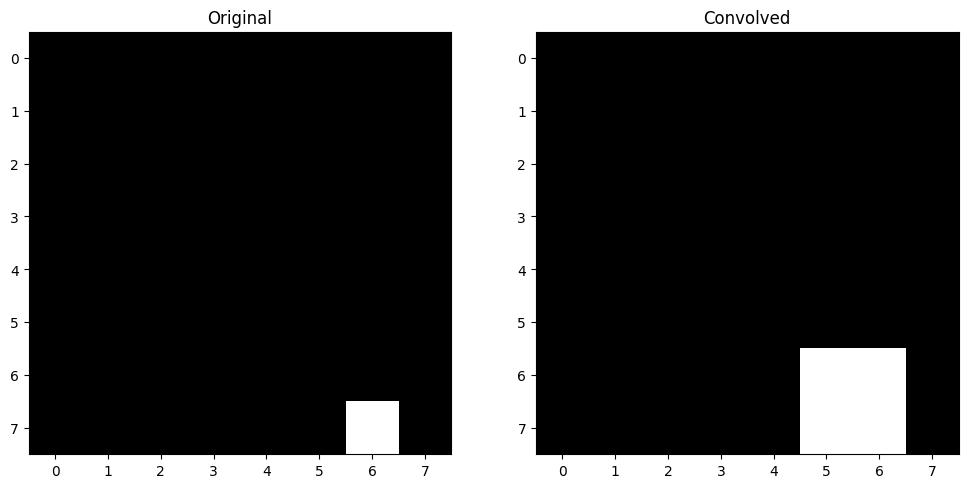

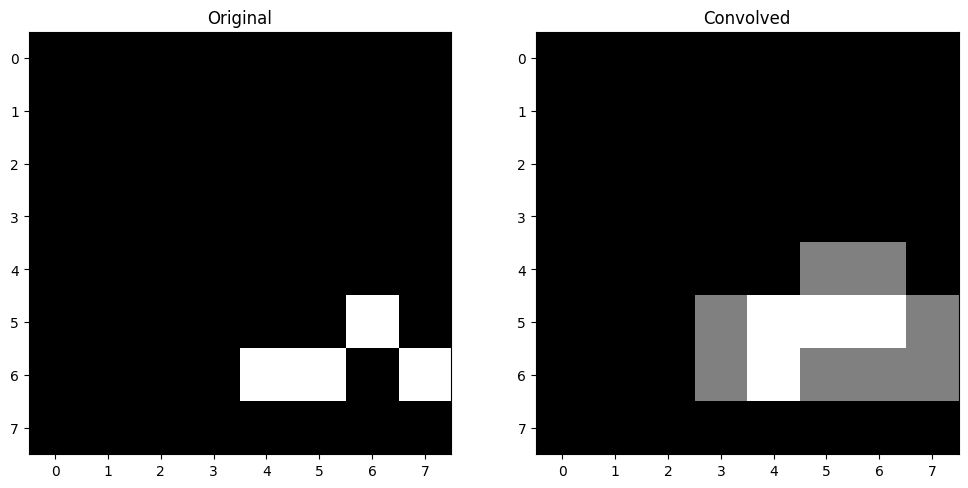

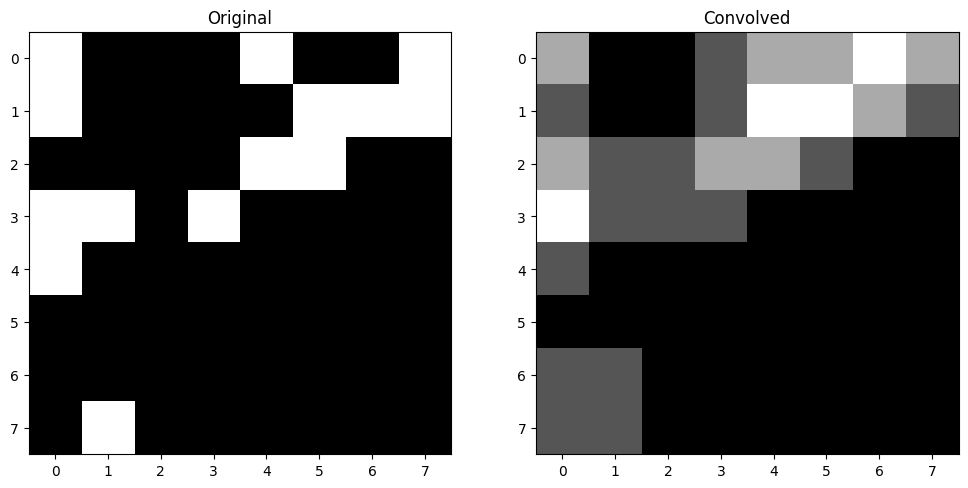

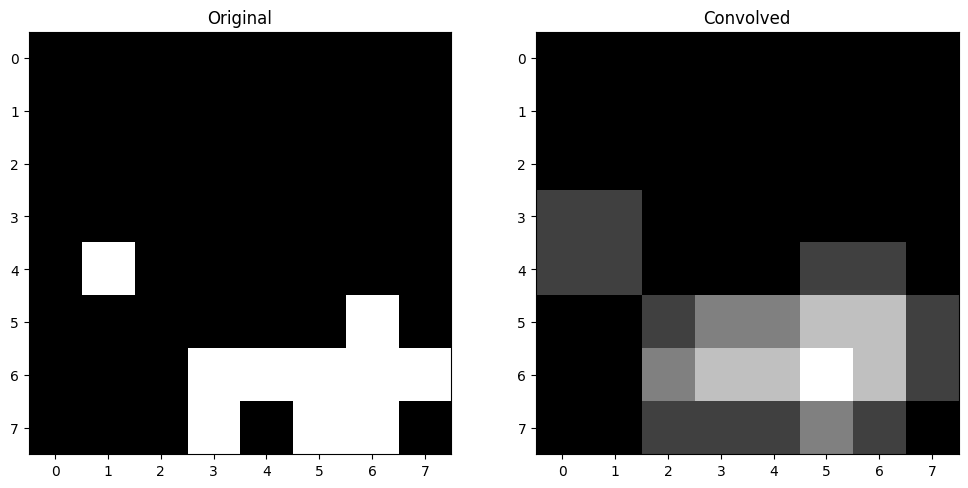

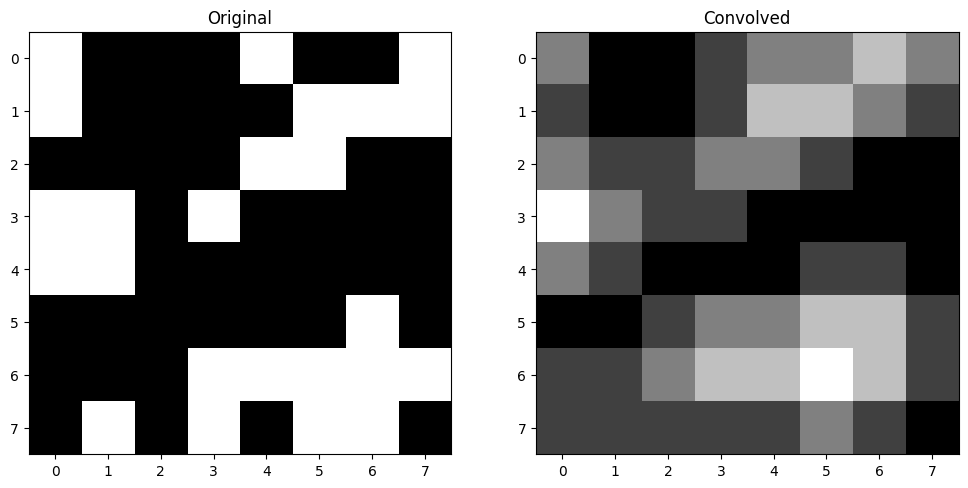

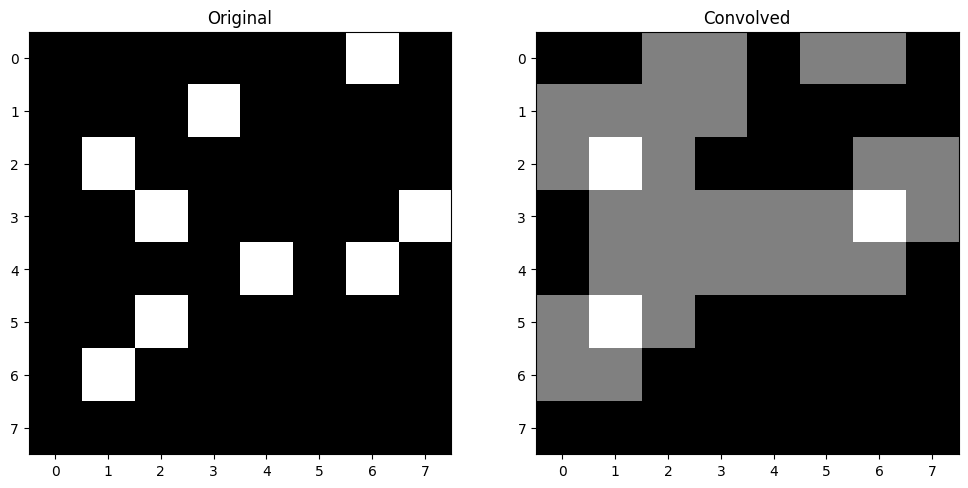

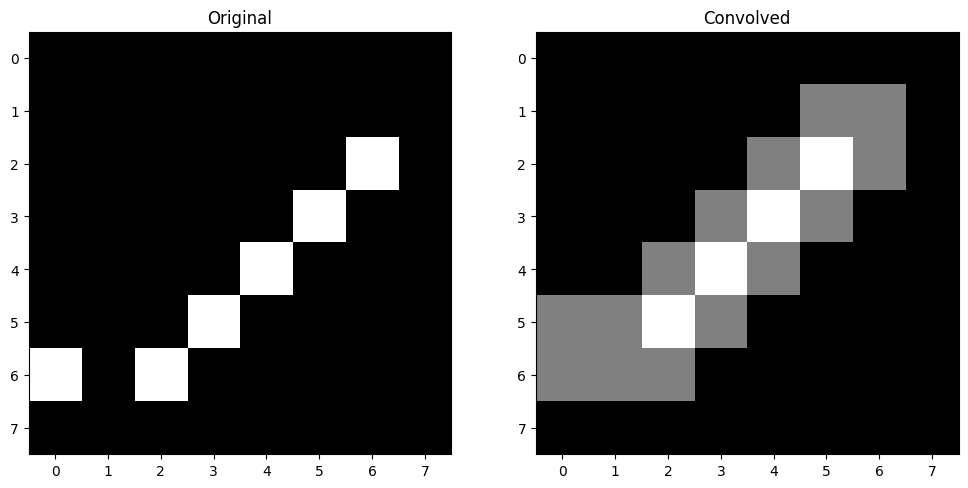

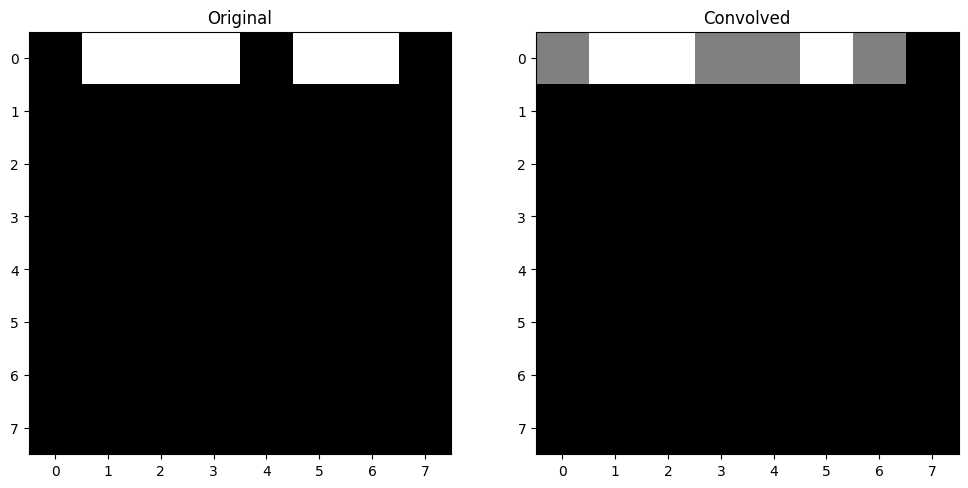

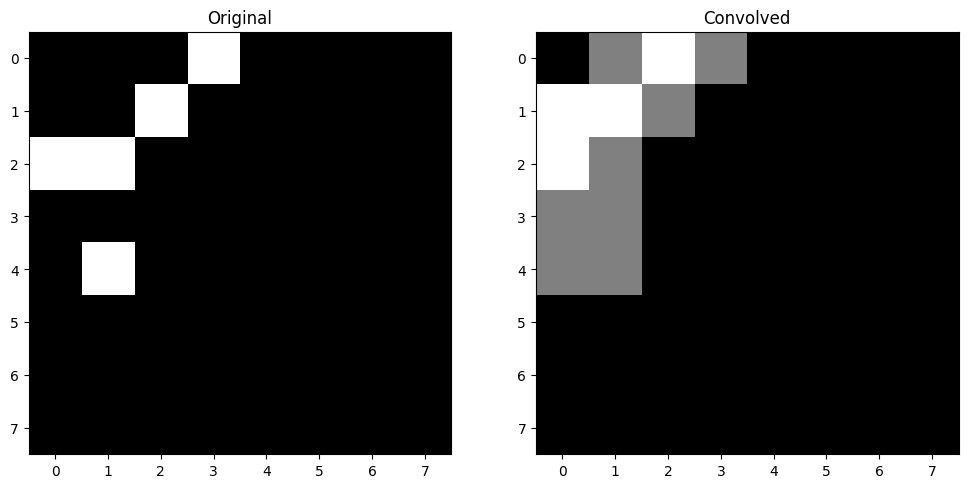

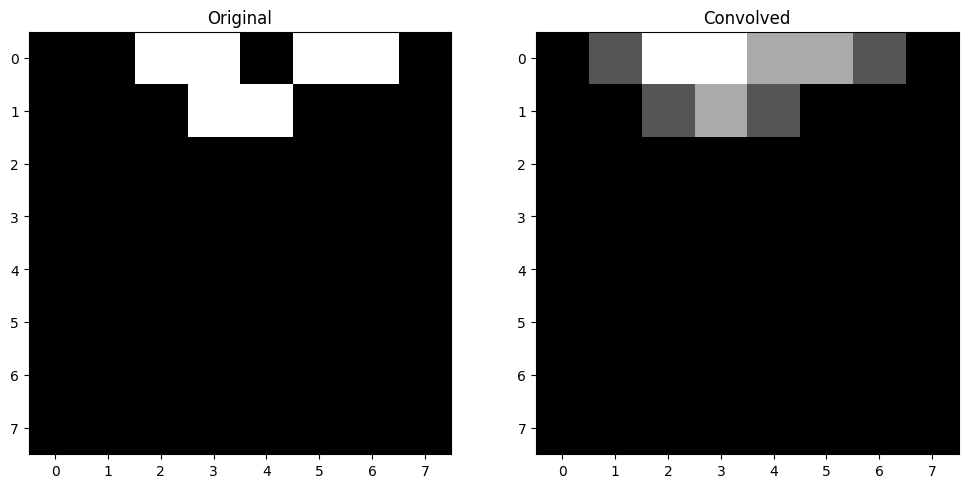

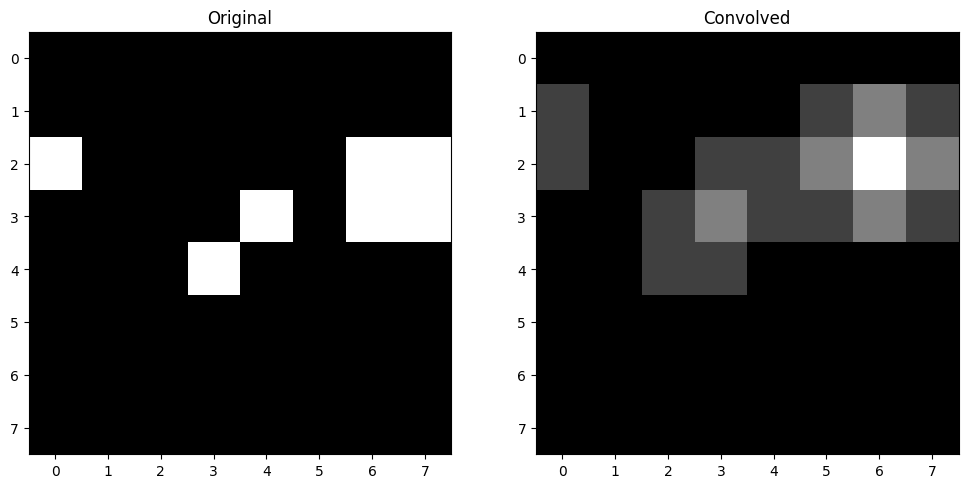

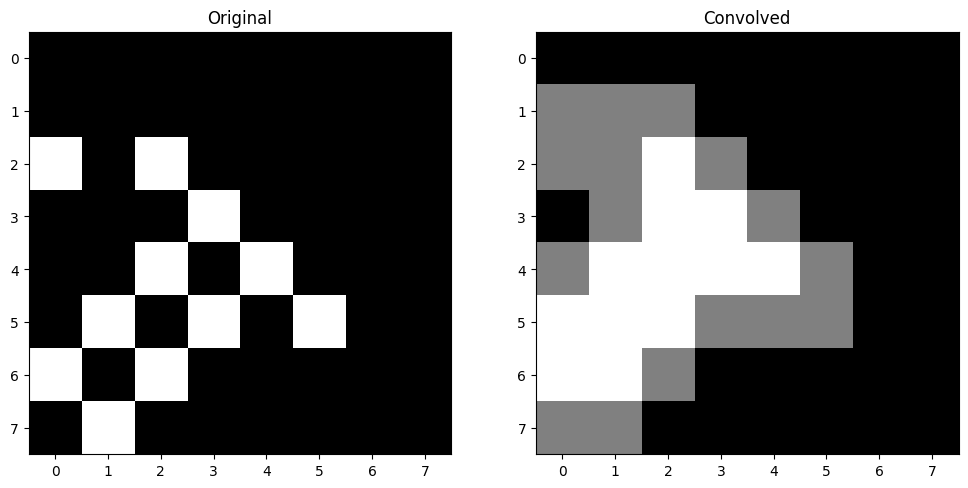

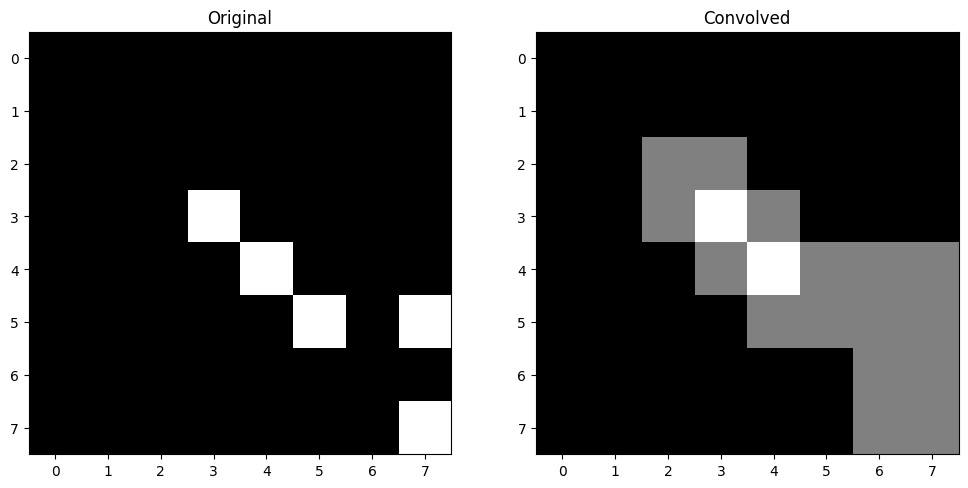

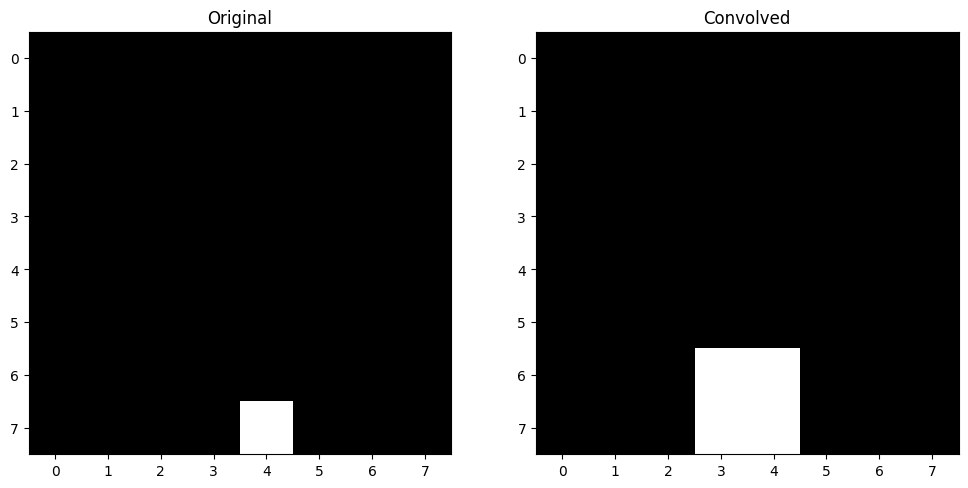

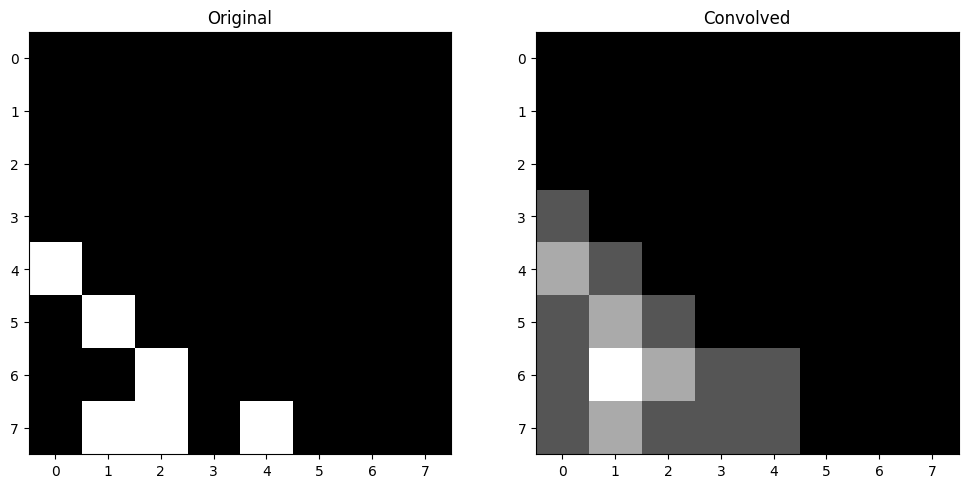

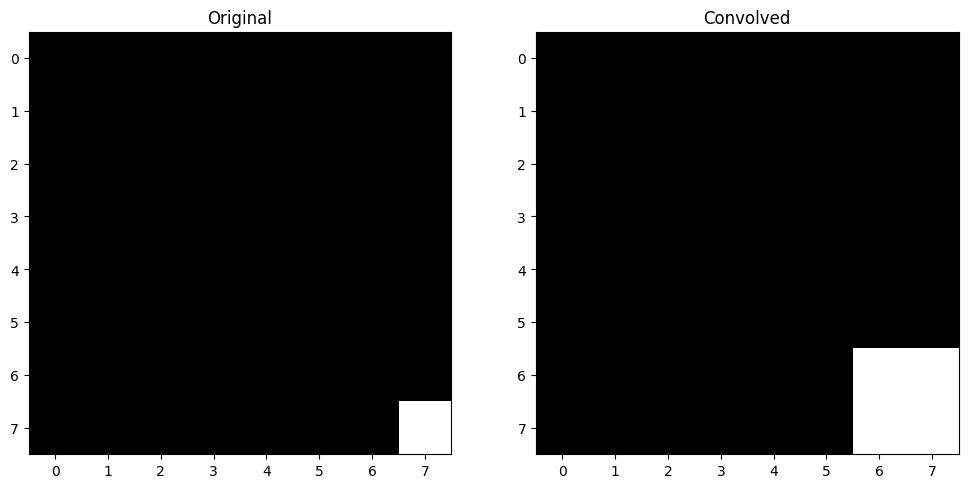

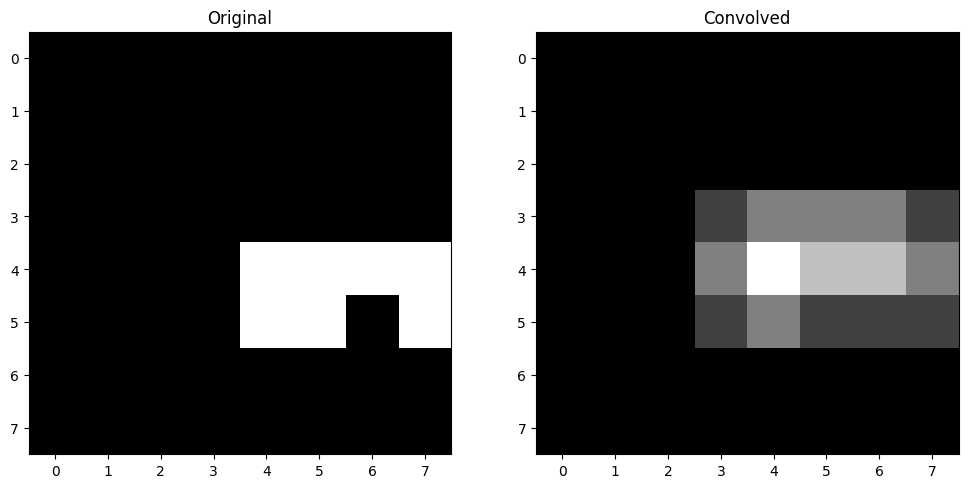

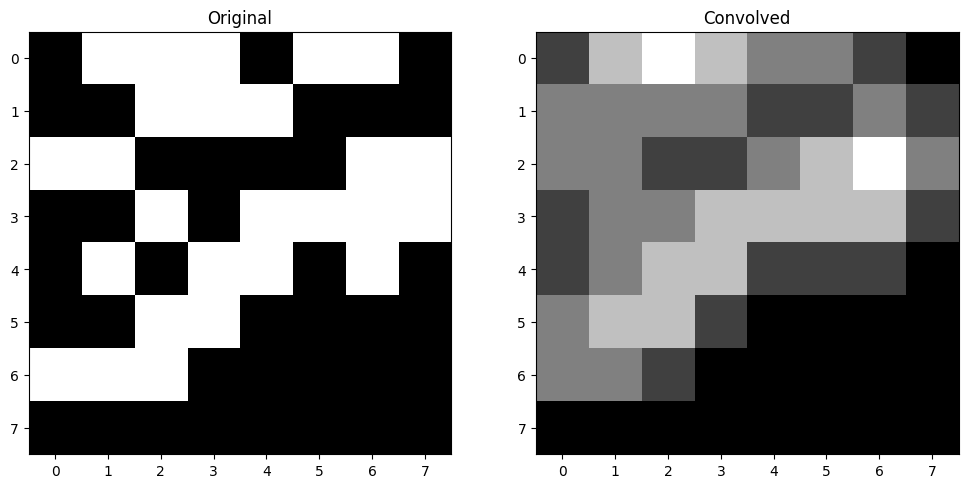

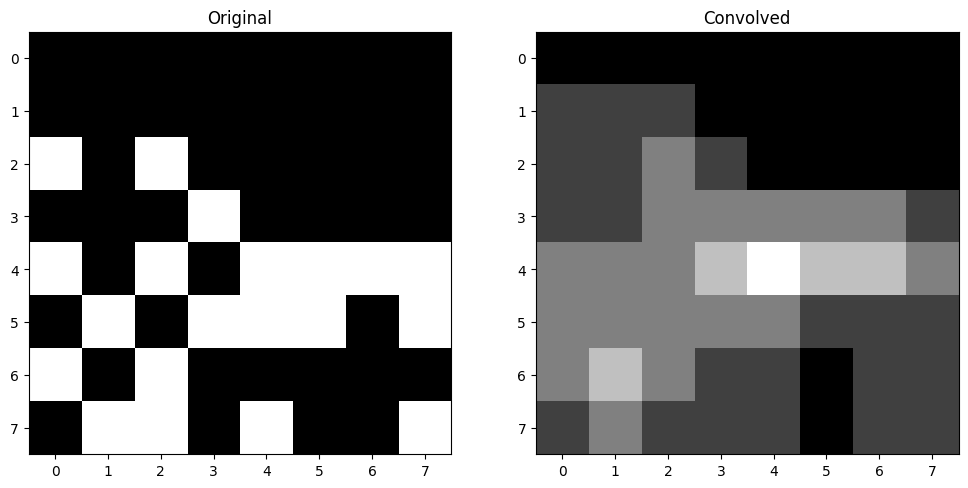

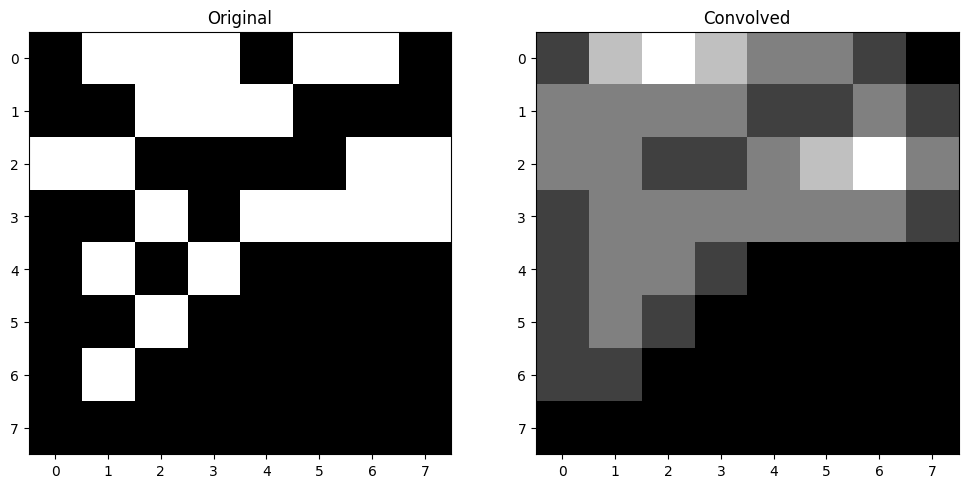

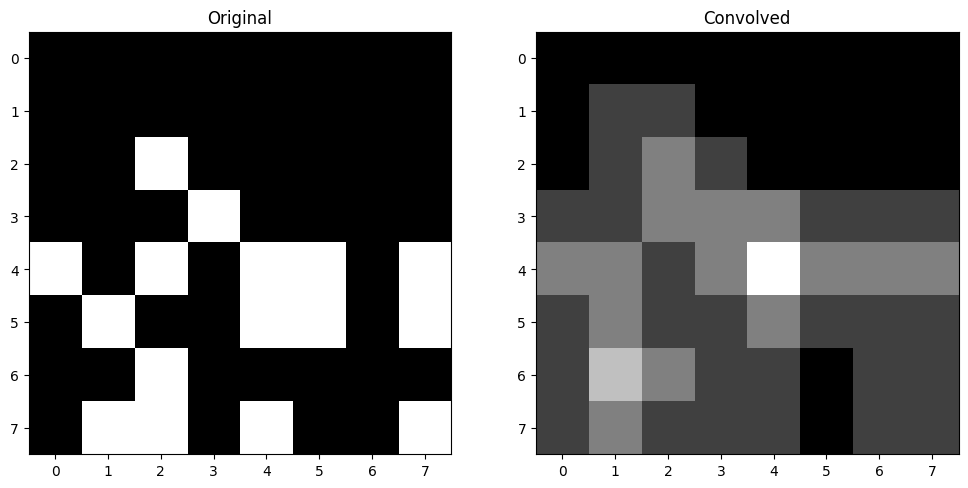

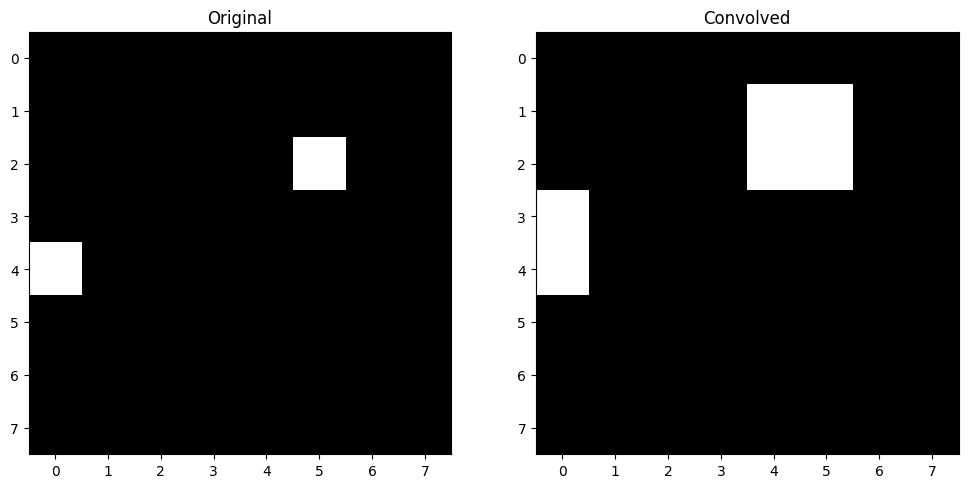

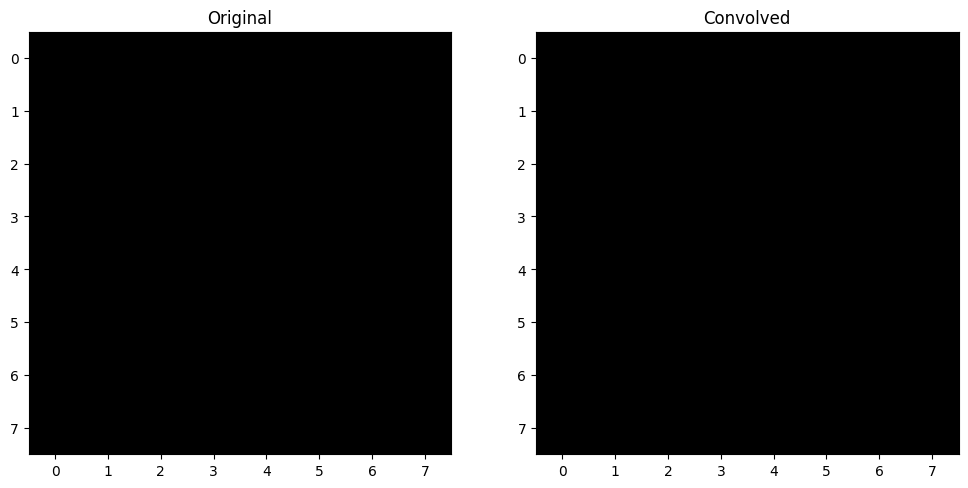

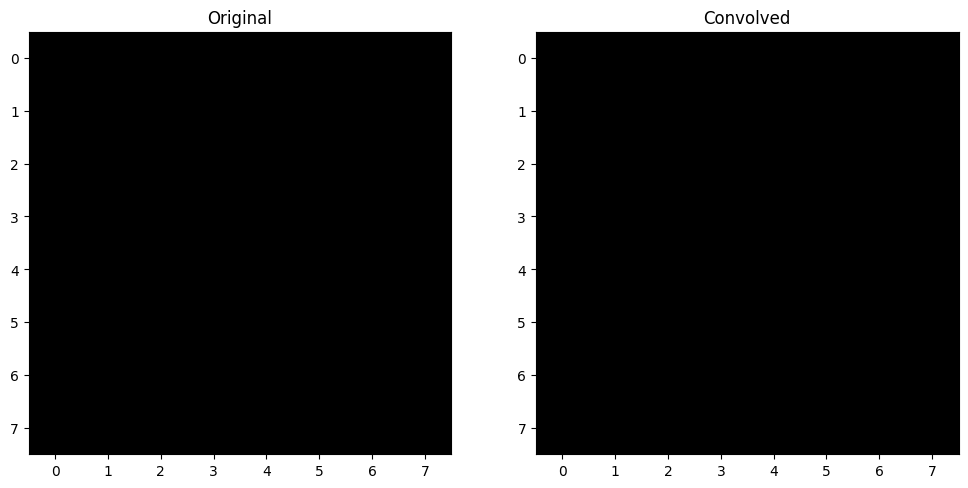

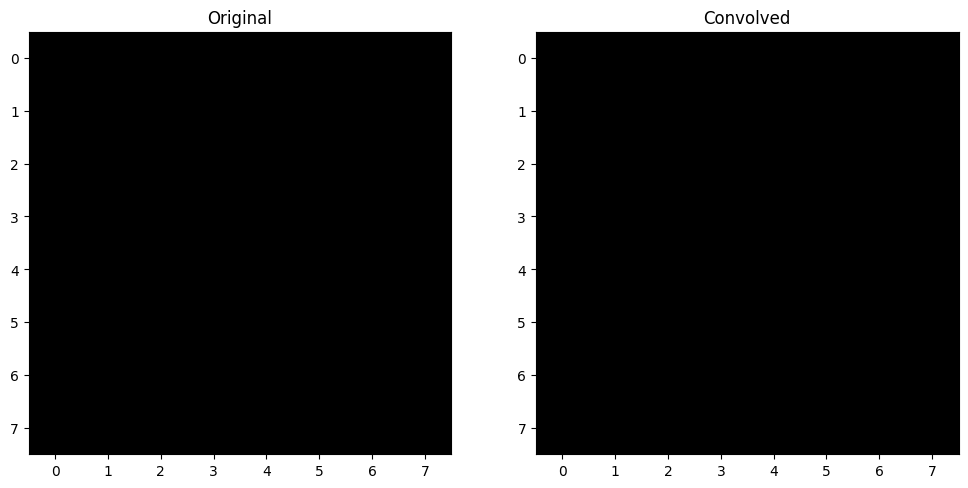

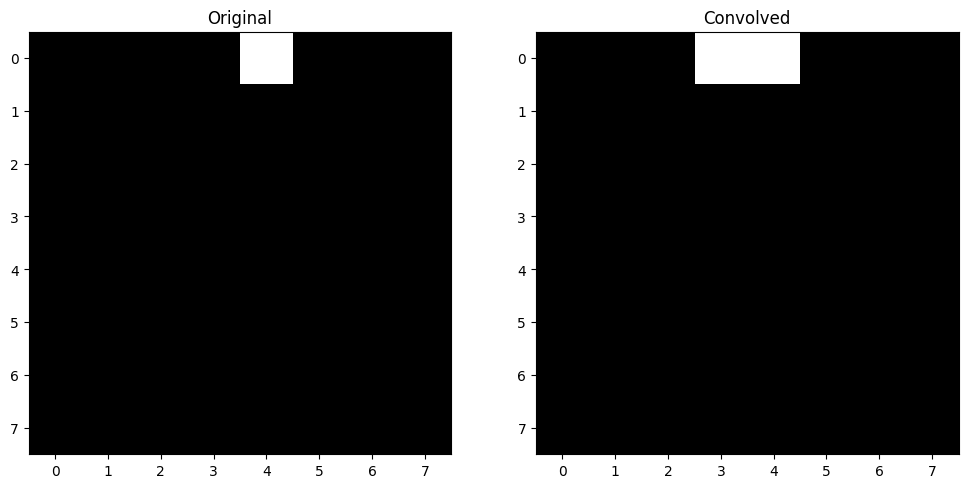

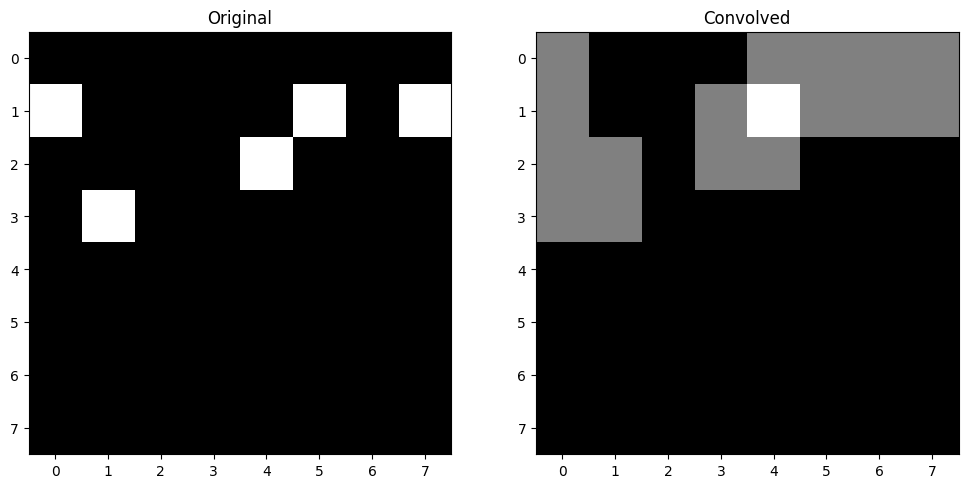

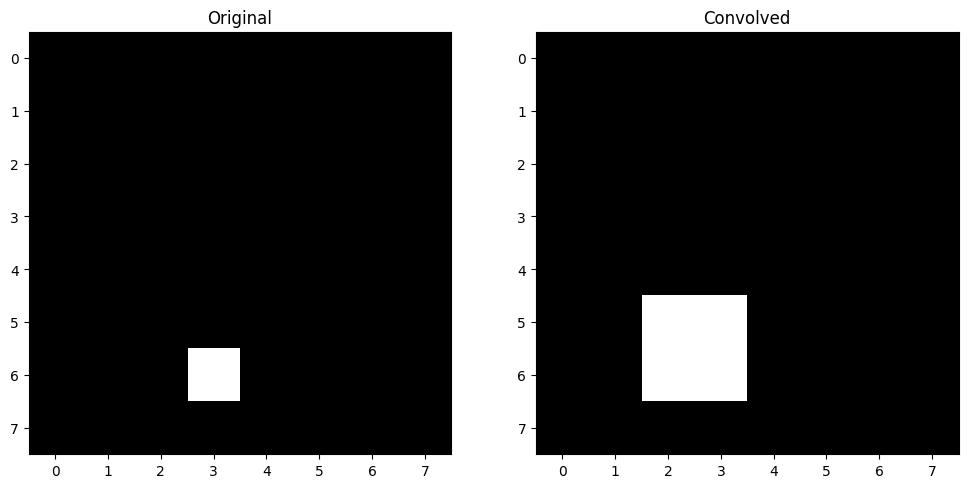

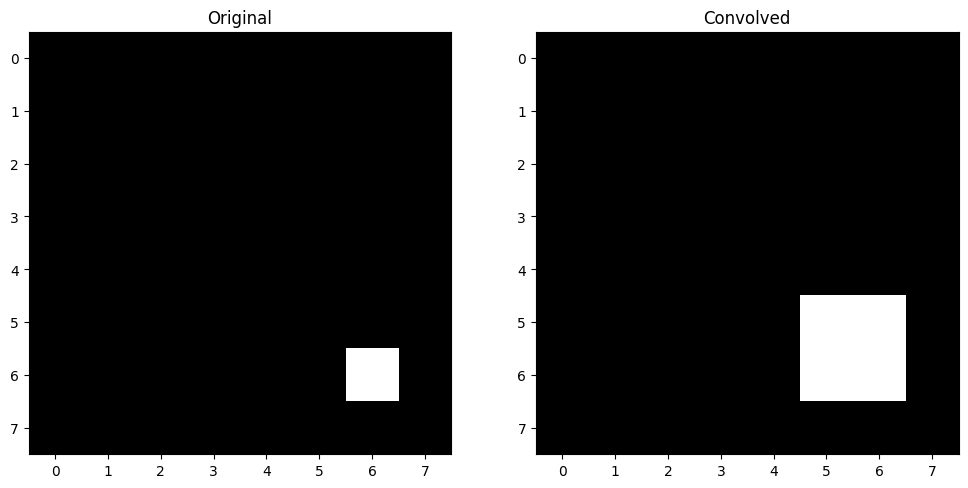

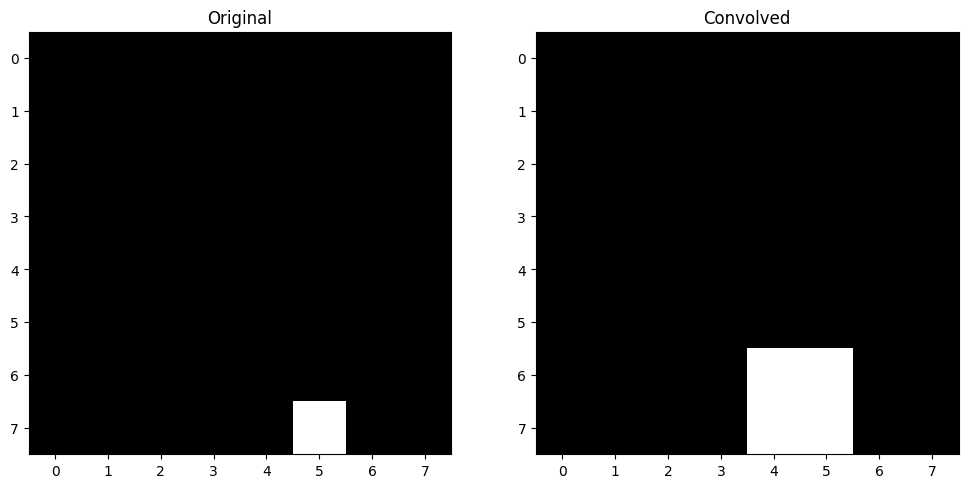

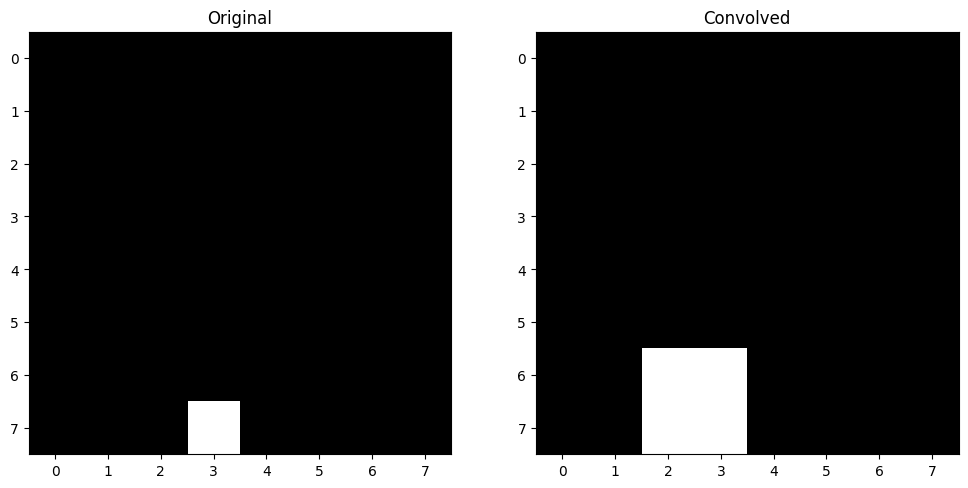

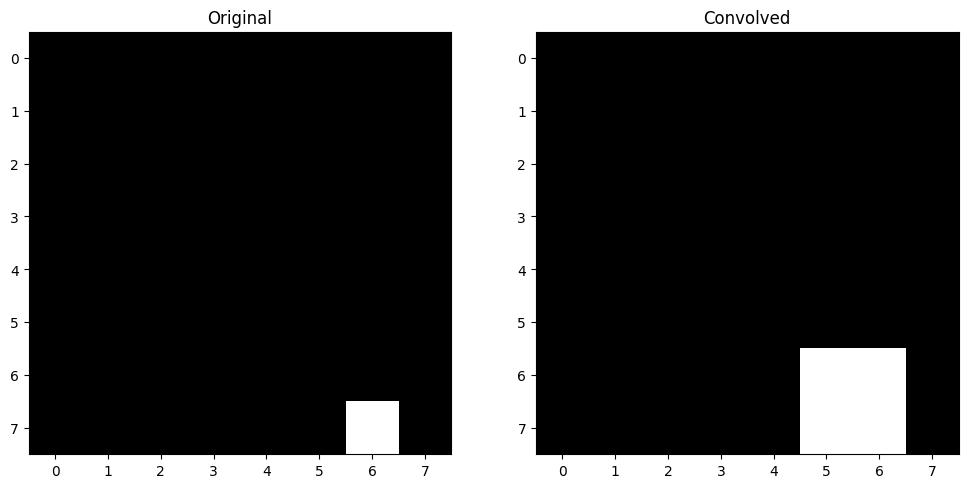

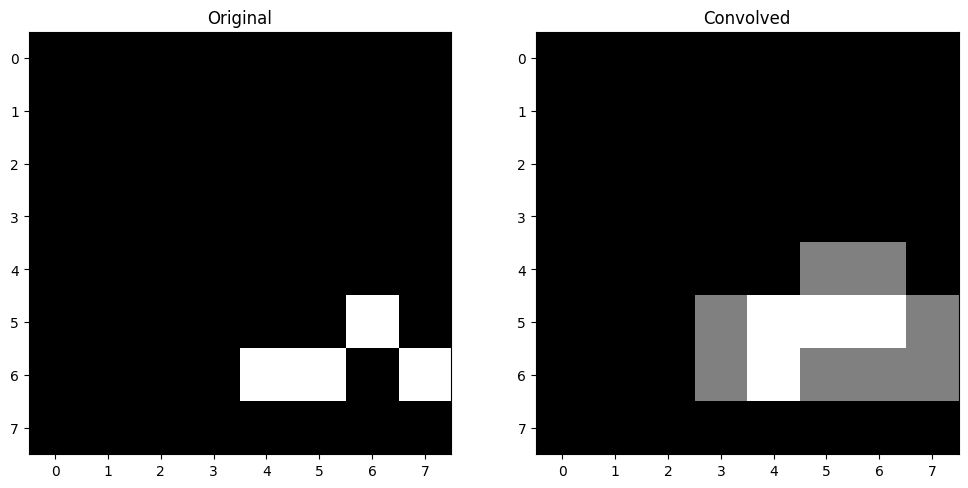

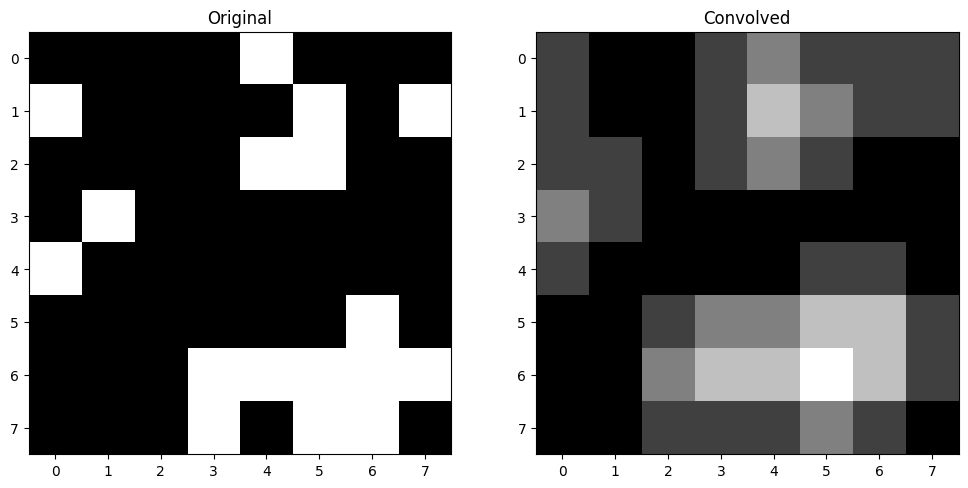

In [36]:

# and you've already executed the splitting and squeezing operations as described before.

# Step 1: Define a 2D Convolution Operation
# Define a simple filter for the convolution, for example, a 2x2 average filter
filter = tf.constant([[1, 1], [1, 1]], dtype=tf.float32) / 4.0  # Normalizing the filter
filter = tf.reshape(filter, [2, 2, 1, 1])  # Reshape to [filter_height, filter_width, in_channels, out_channels]

# Prepare for convolution (expand dimensions of each tensor)
expanded_matrices = [tf.expand_dims(tf.expand_dims(matrix, 0), -1) for matrix in squeezed_matrices_float32]

# Step 2: Perform the Convolution
convolved_matrices = [tf.nn.conv2d(matrix, filter, strides=[1, 1, 1, 1], padding="SAME") for matrix in expanded_matrices]

# Flatten the convolved_matrices for plotting
convolved_matrices_flat = [tf.squeeze(matrix) for matrix in convolved_matrices]

# Step 3: Graph the Results
# As an example, let's plot the original and convolved tensor for the first matrix
for i in range(0,dg.shape[0][2]):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(squeezed_matrices_float32[i], cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title('Convolved')
    plt.imshow(convolved_matrices_flat[i], cmap='gray')
    plt.show()

In [13]:
pooling = tf.nn.max_pool(tensor_reshaped, ksize=[2,2], strides=[1,1], padding='VALID')


In [14]:
pooling.shape

TensorShape([50, 7, 7, 1])

In [15]:
tensor_reshaped_np = tensor_reshaped.numpy()
pooled_output_np = pooling.numpy()

# Function to plot a single channel before and after pooling
def plot_channel_before_after(channel_index):
    
    original = tensor_reshaped_np[channel_index, :, :, 0]
    pooled = pooled_output_np[channel_index, :, :, 0]

    plt.figure(figsize=(10, 5))

    # Plot original matrix
    plt.subplot(1, 2, 1)
    plt.title(f'Channel {channel_index+1} Before Pooling')
    plt.imshow(original, cmap='viridis', interpolation='nearest')
    plt.colorbar()

    # Plot pooled matrix
    plt.subplot(1, 2, 2)
    plt.title(f'Channel {channel_index+1} After Pooling')
    plt.imshow(pooled, cmap='viridis', interpolation='nearest')
    plt.colorbar()

    plt.show()

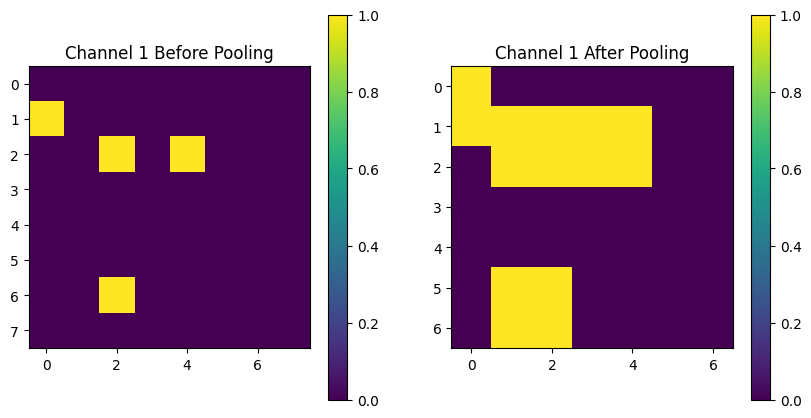

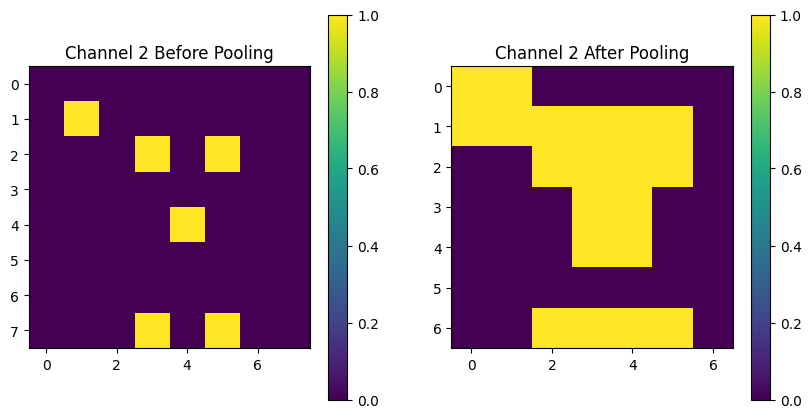

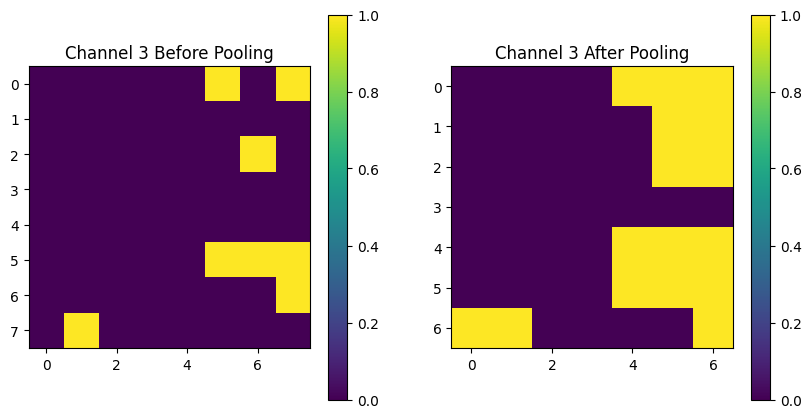

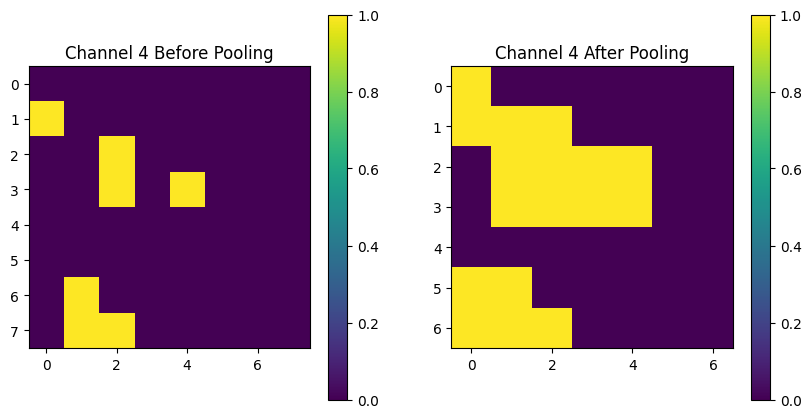

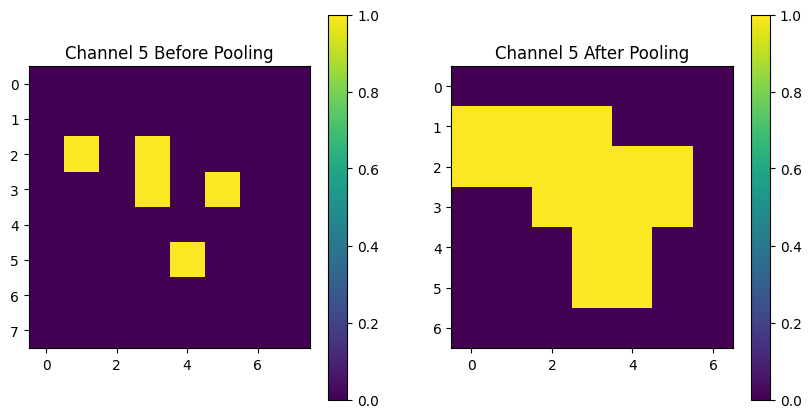

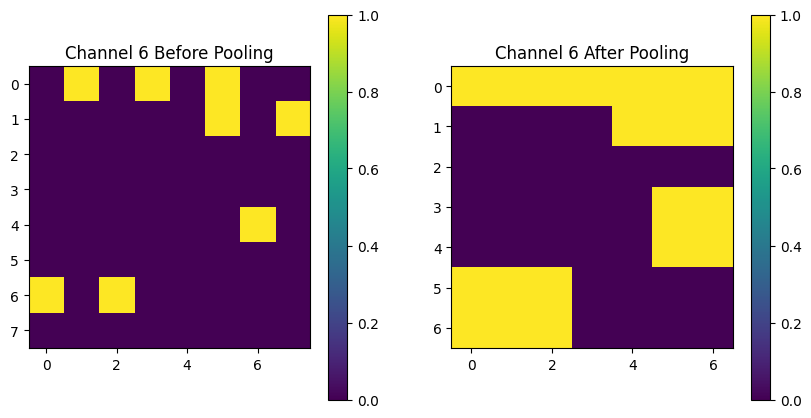

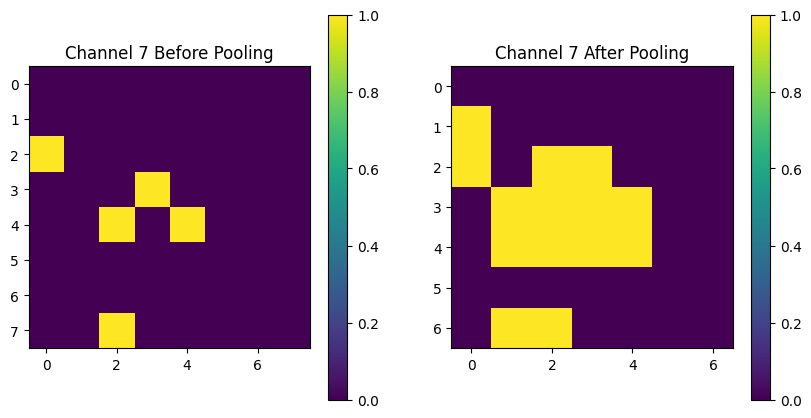

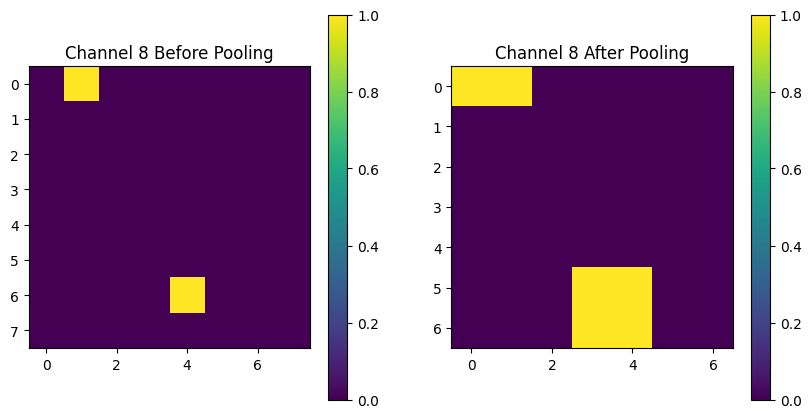

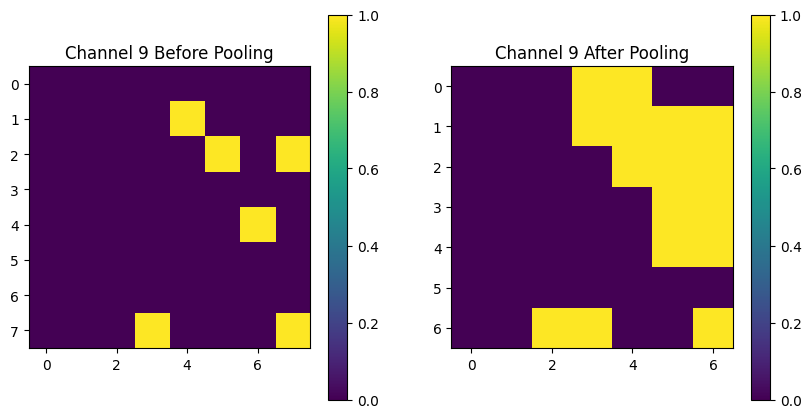

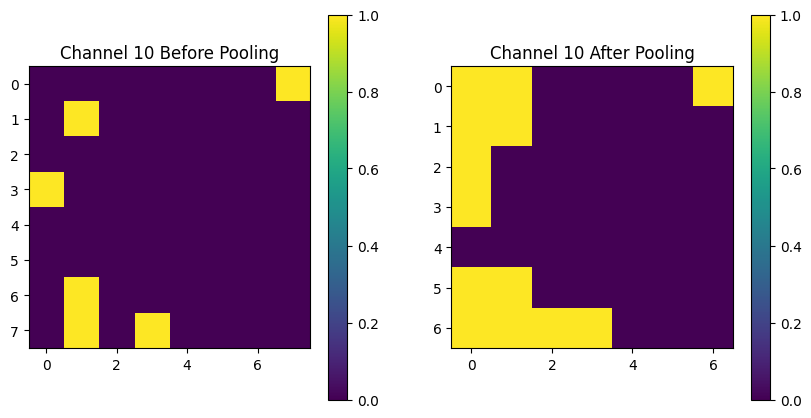

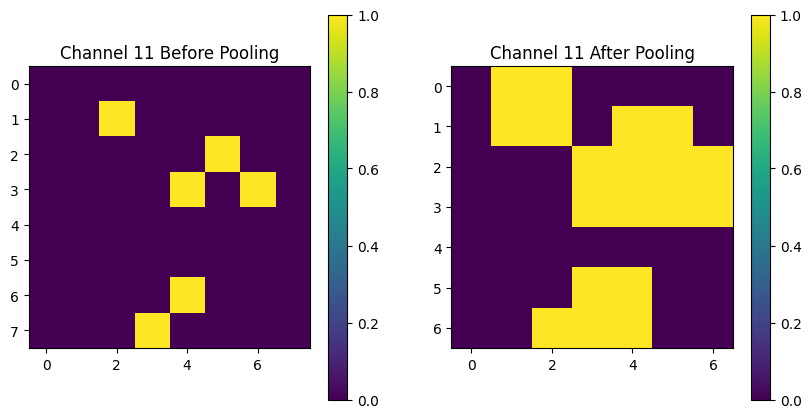

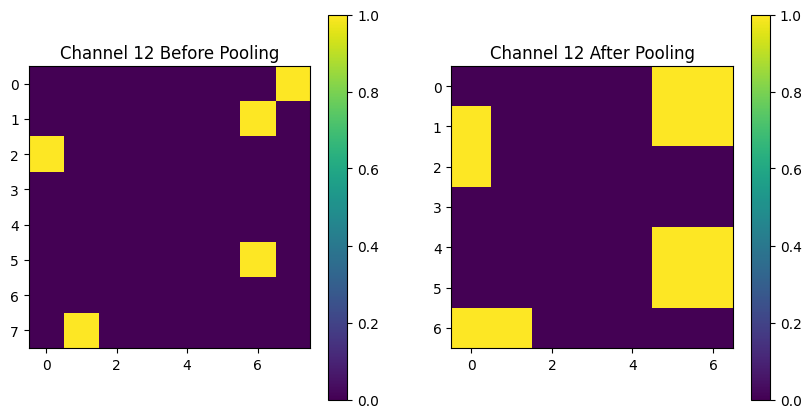

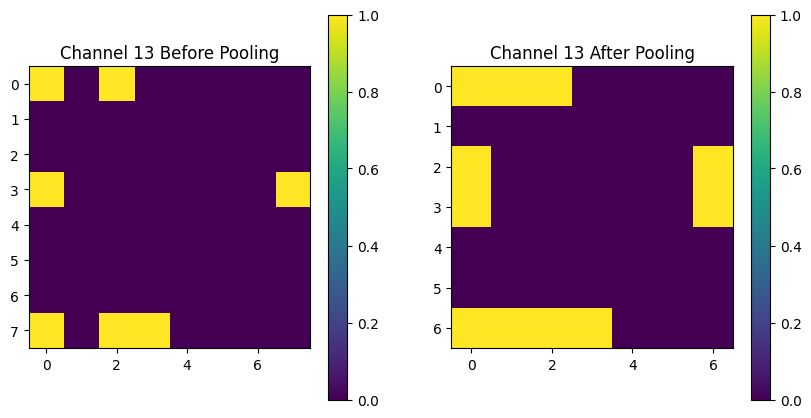

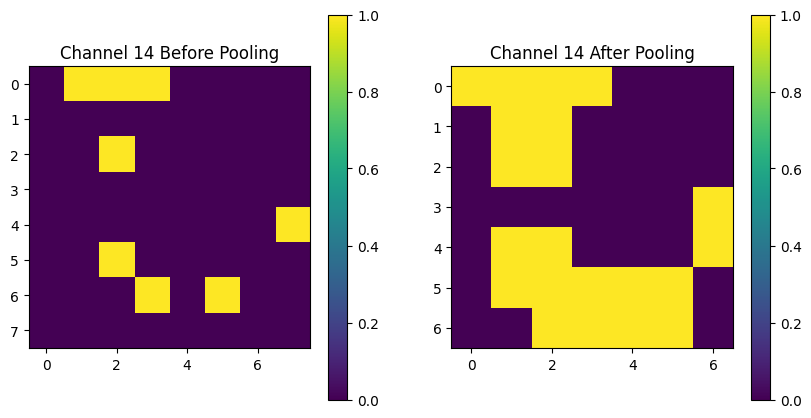

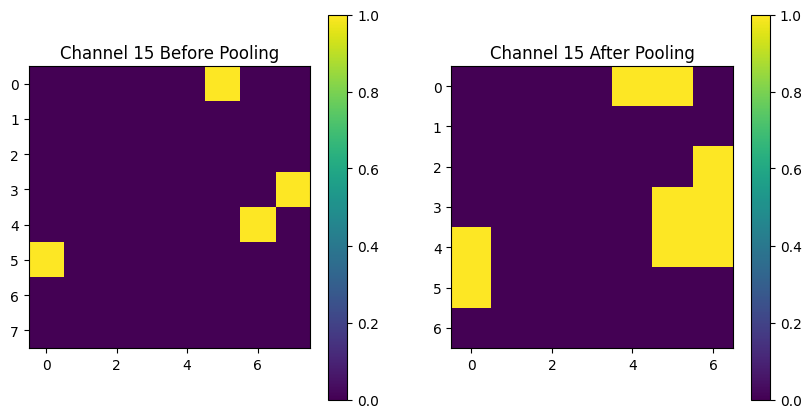

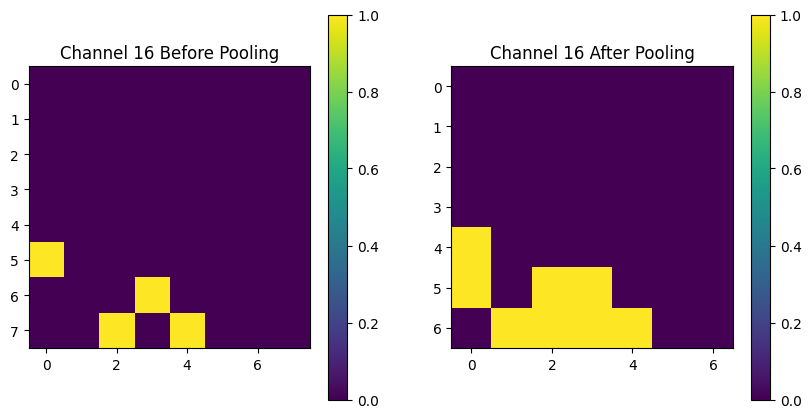

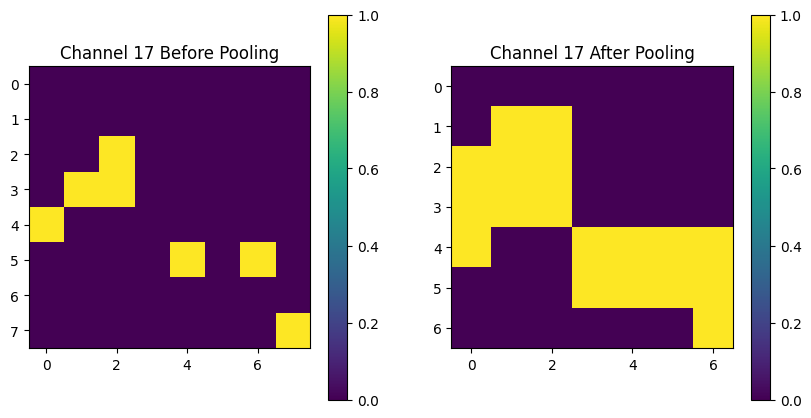

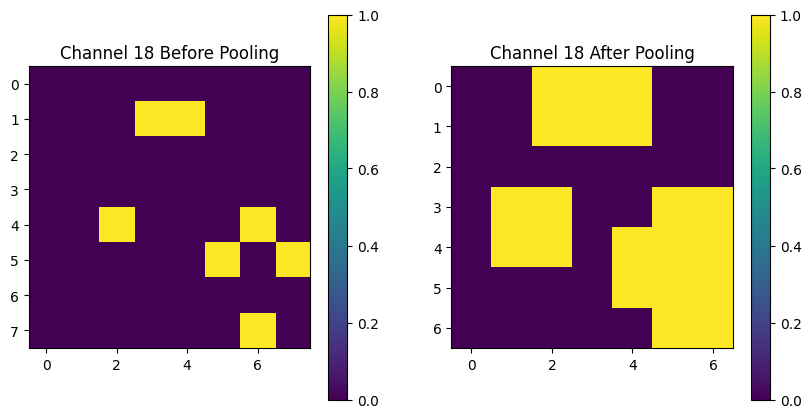

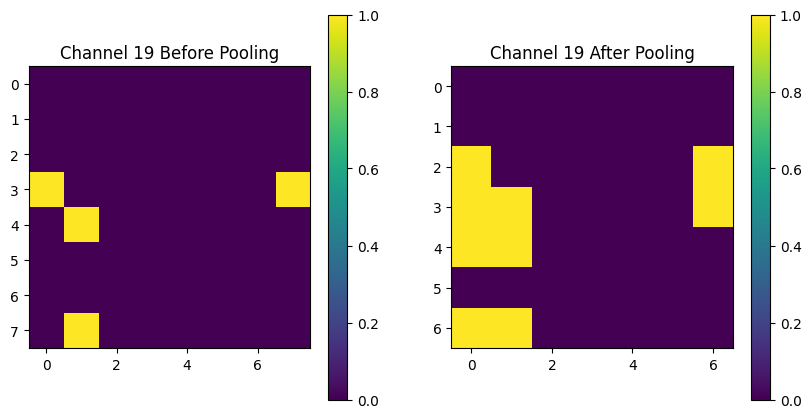

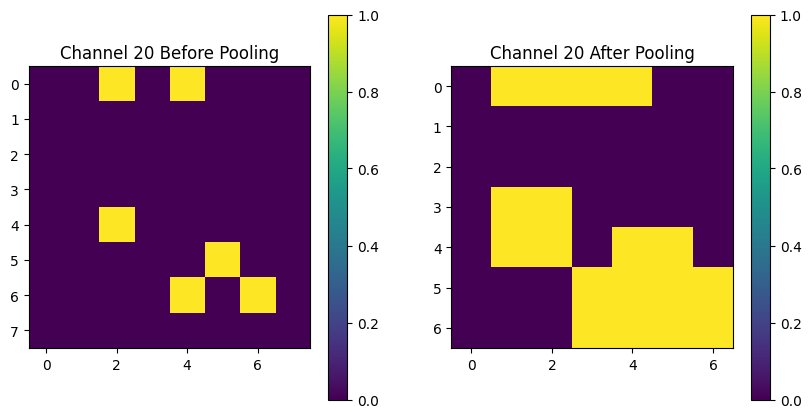

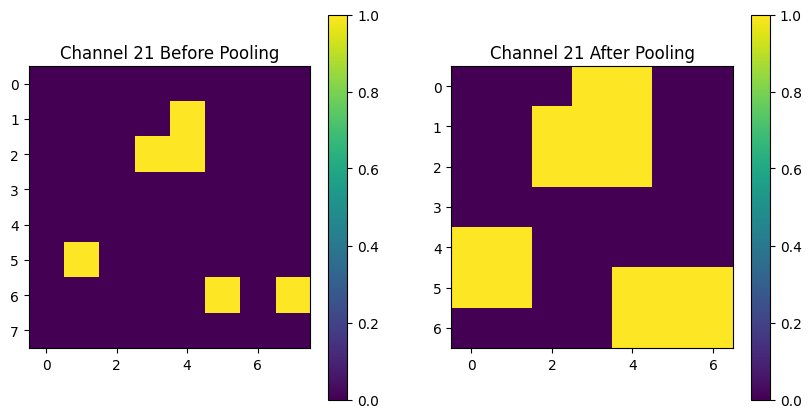

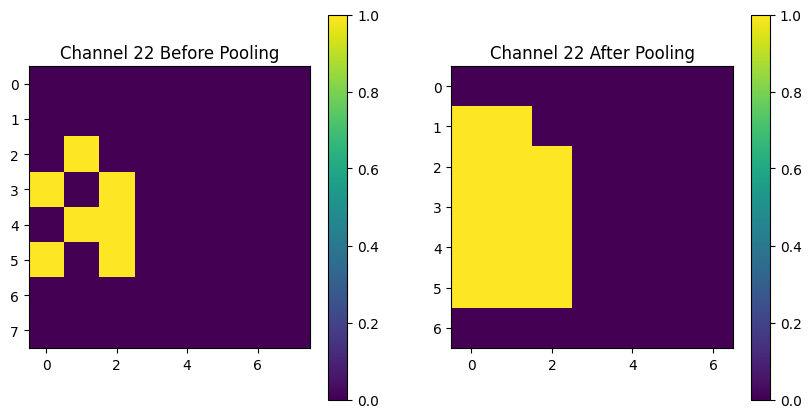

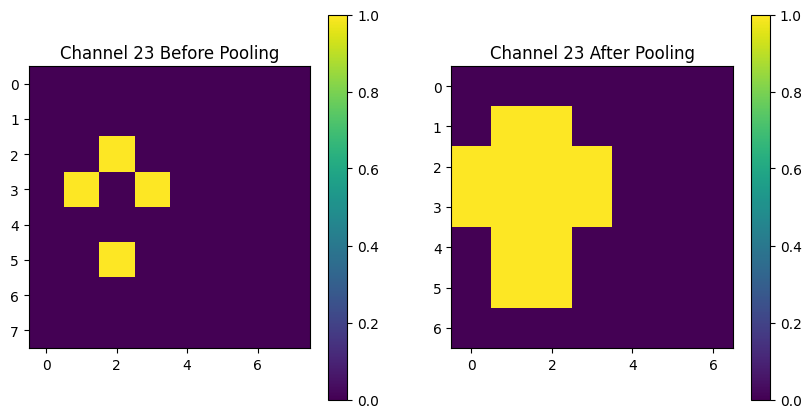

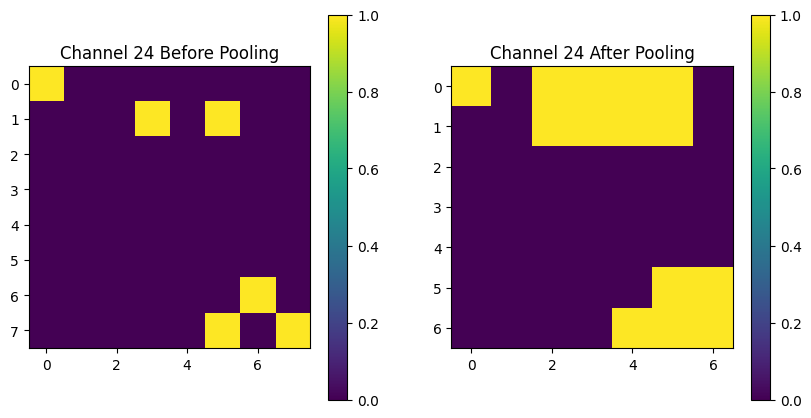

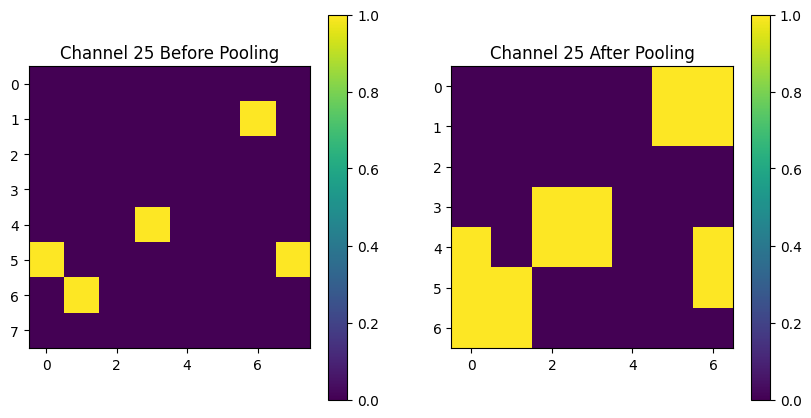

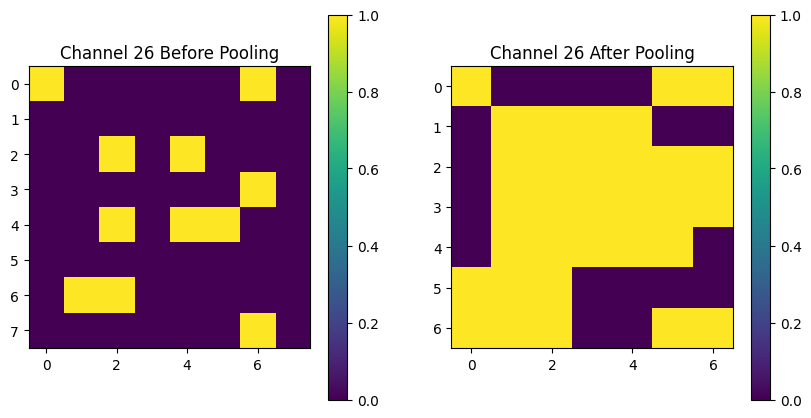

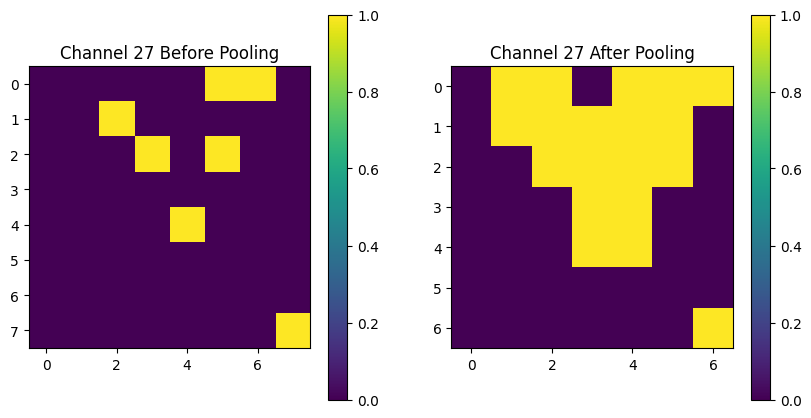

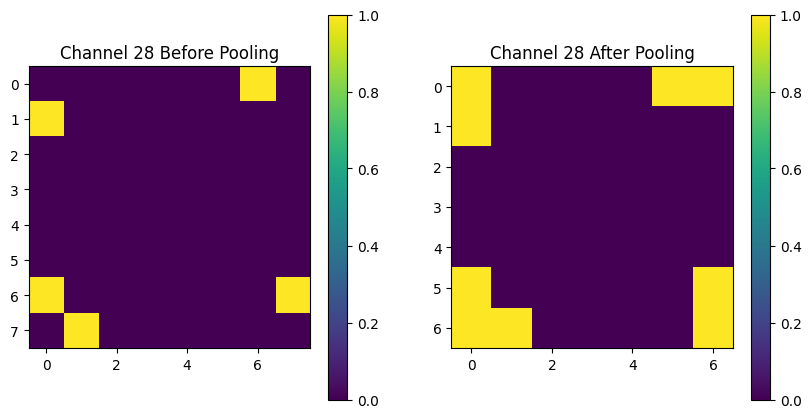

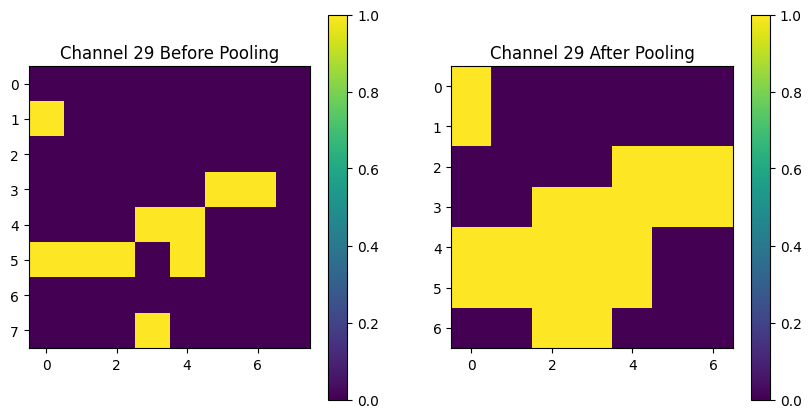

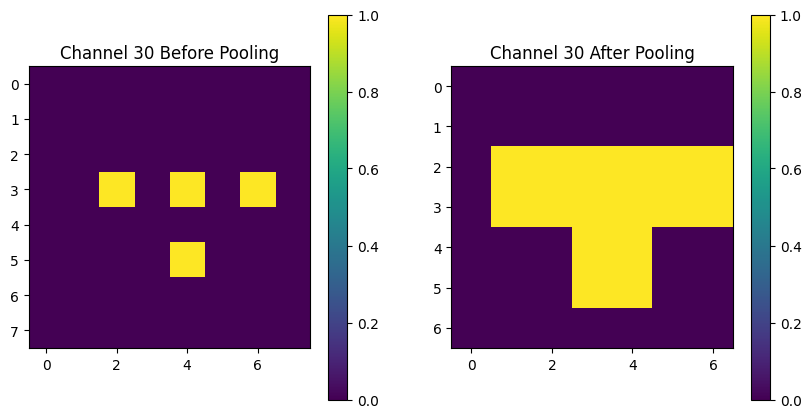

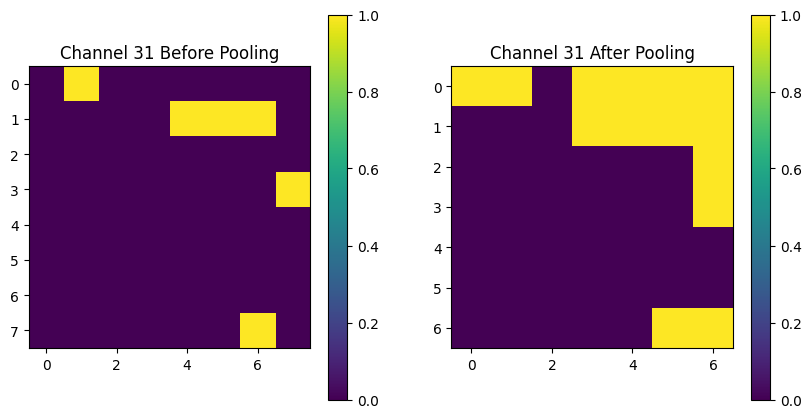

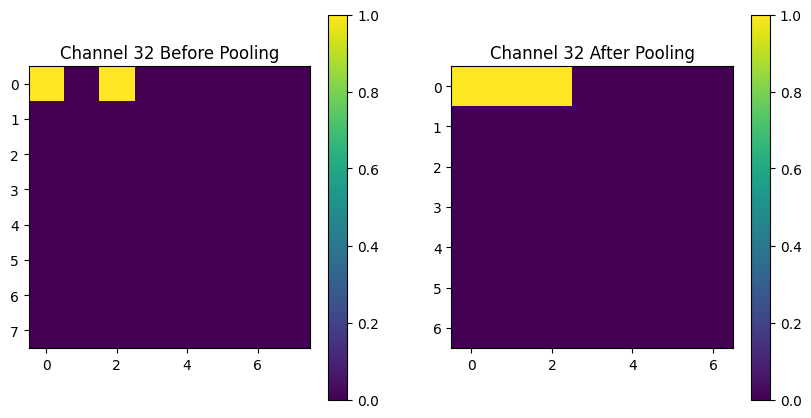

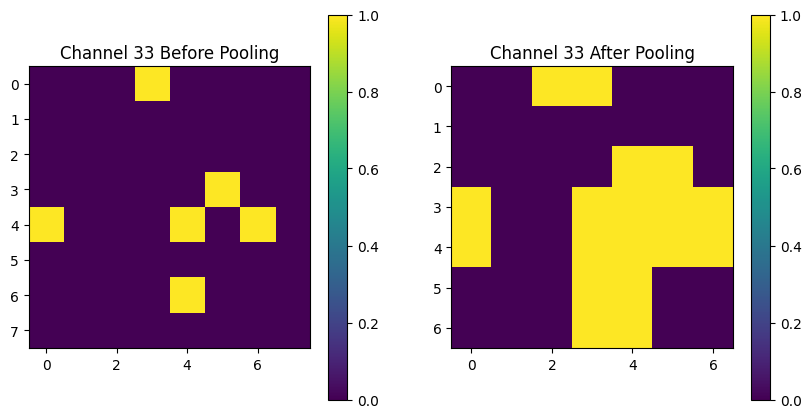

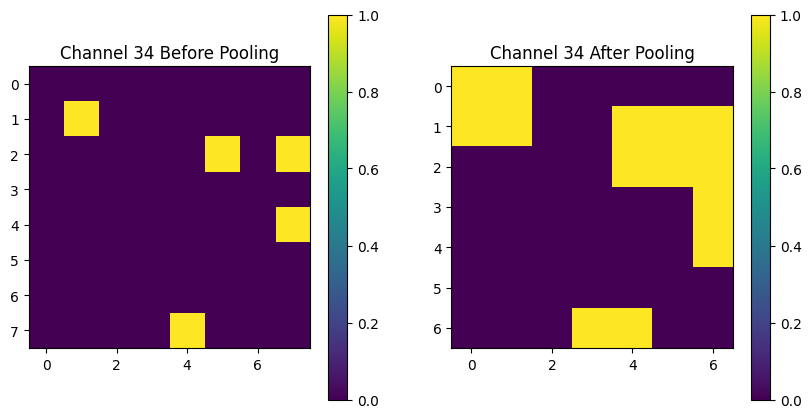

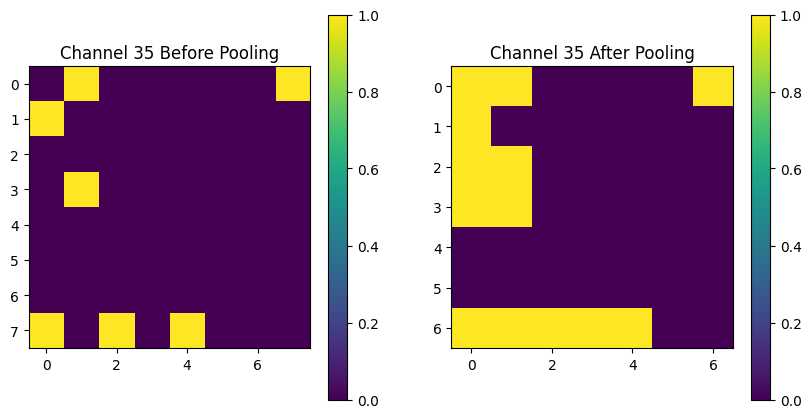

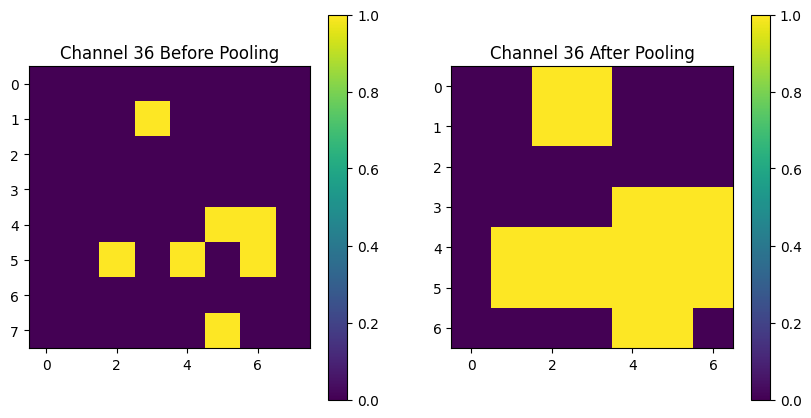

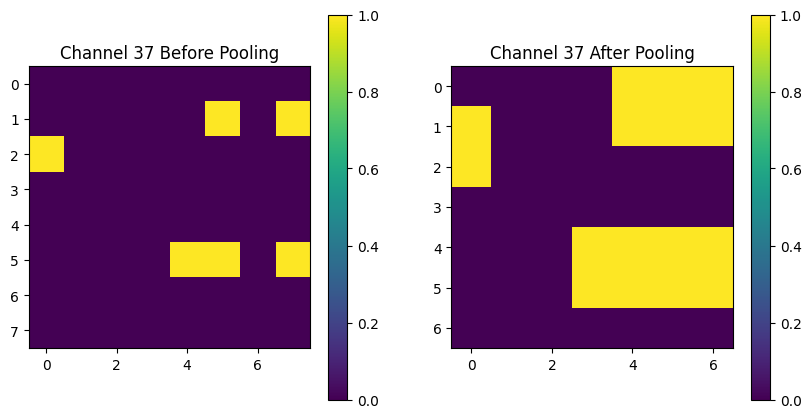

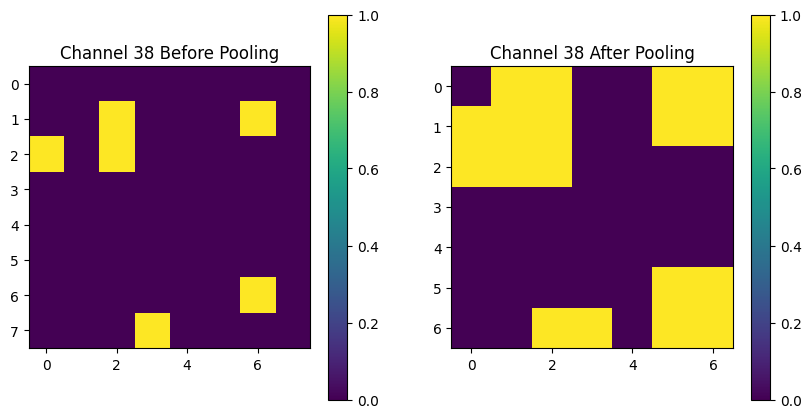

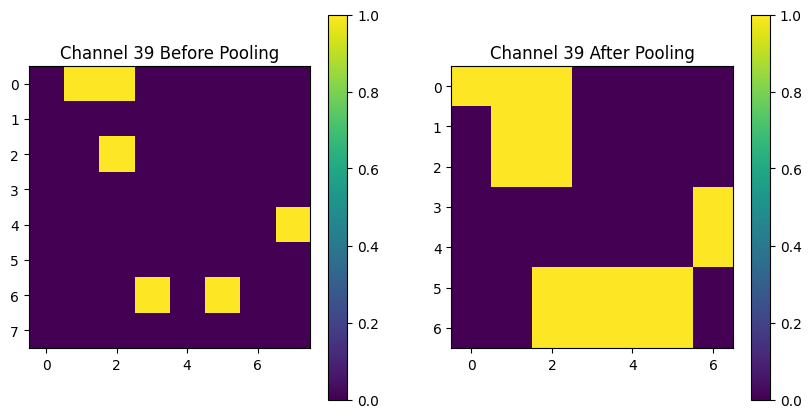

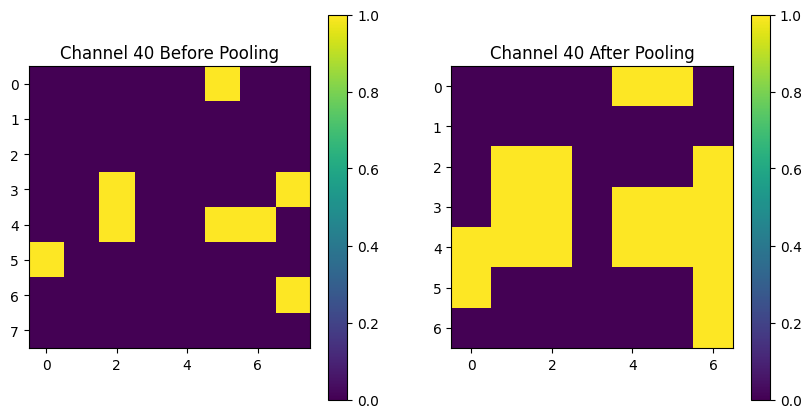

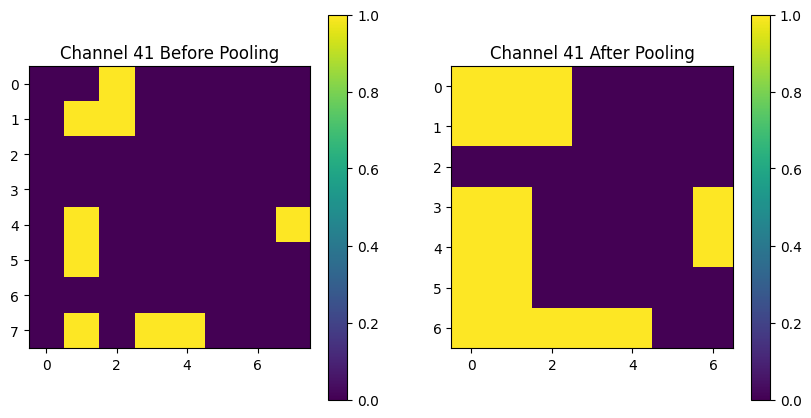

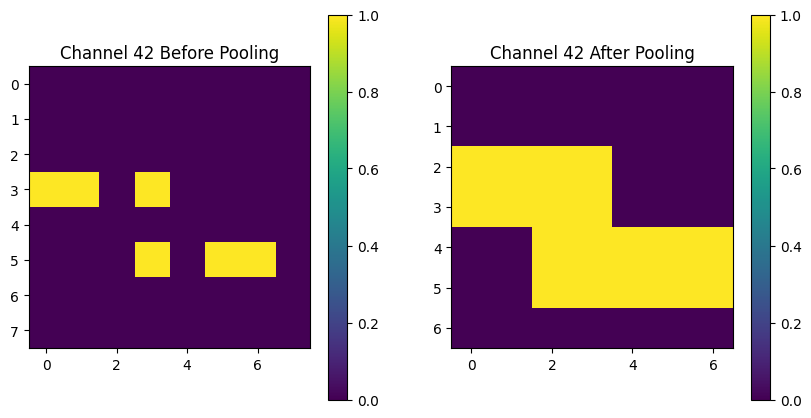

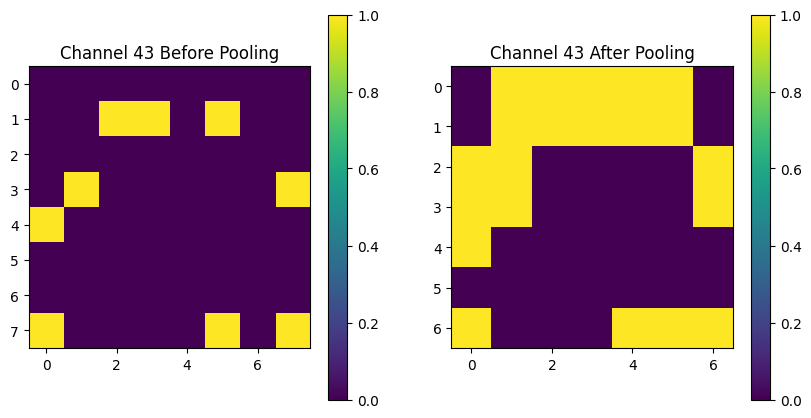

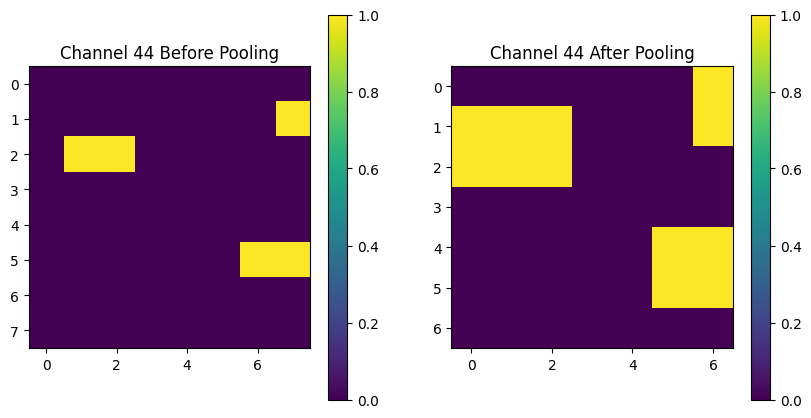

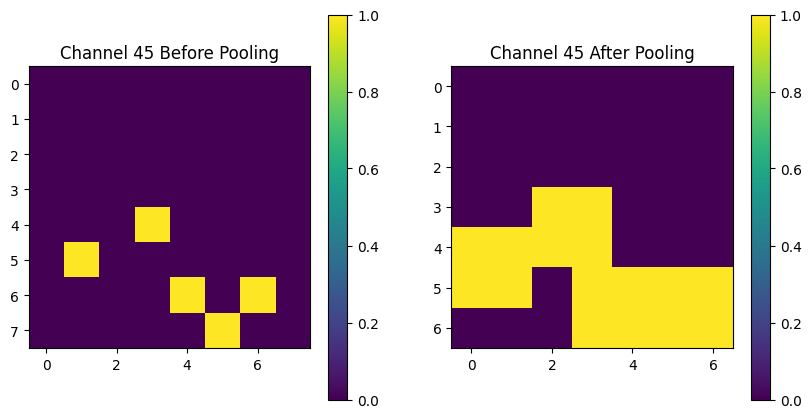

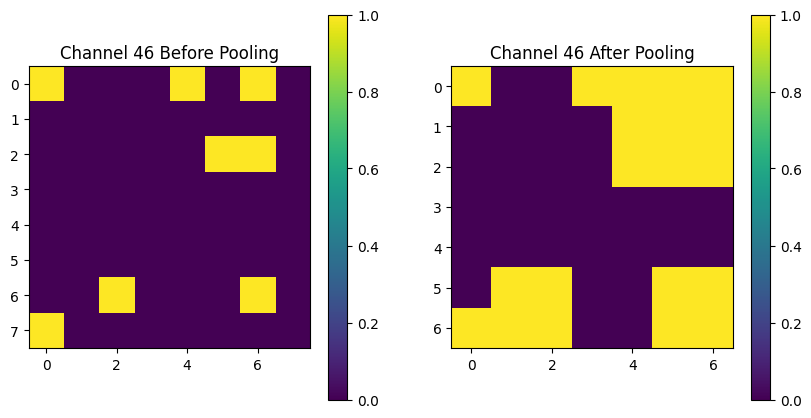

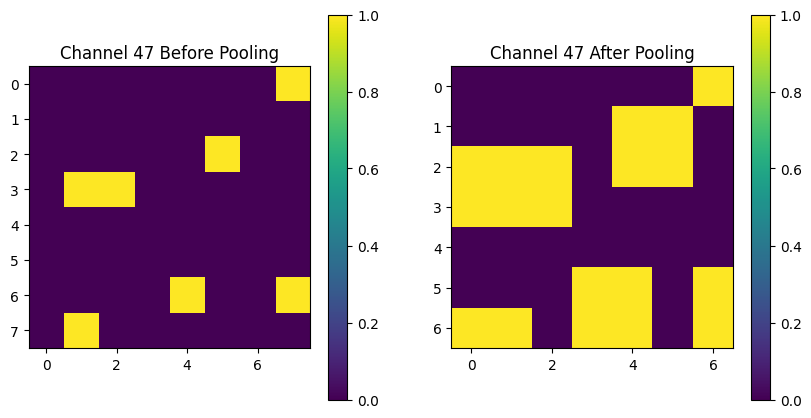

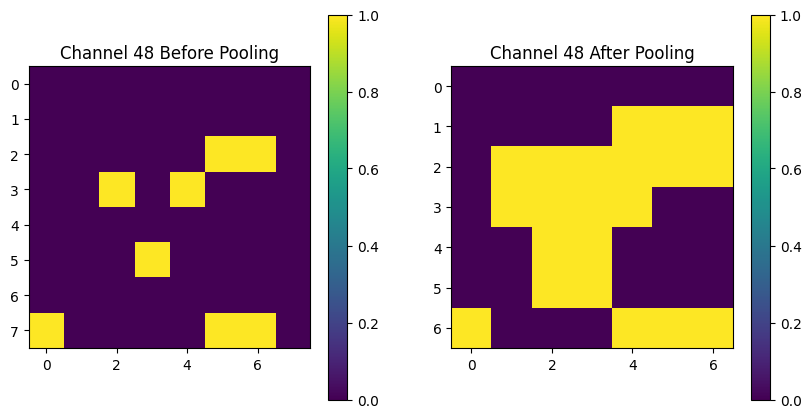

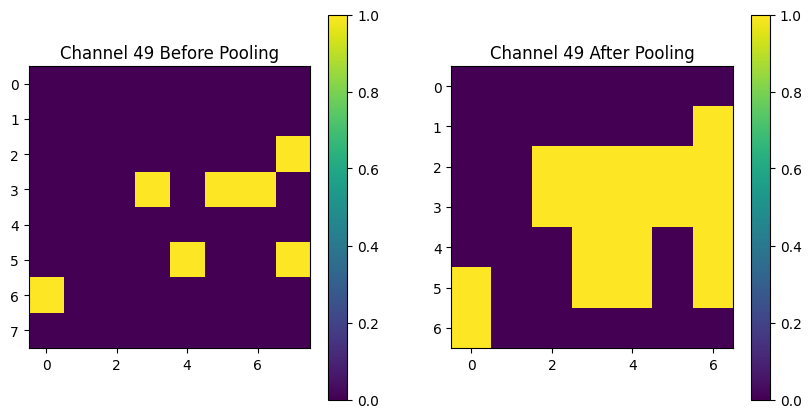

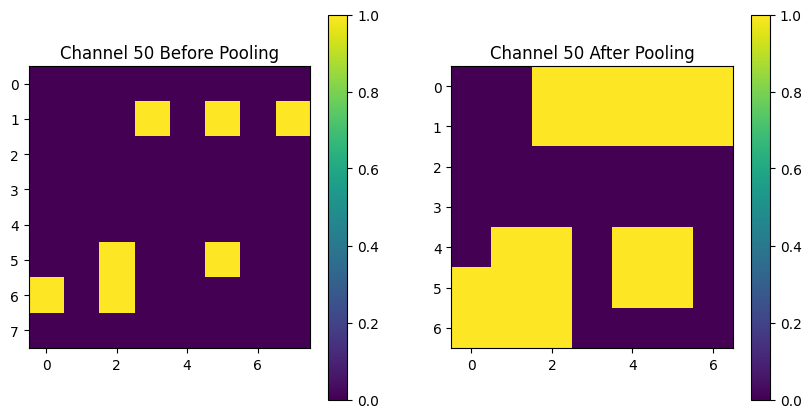

In [16]:
for i in range(0,pooling.shape[0]):
    plot_channel_before_after(i)

In [ ]:
# Ensure tensor_reshaped is of type float32
tensor_reshaped = tf.cast(tensor_reshaped, tf.float32)



# Now, apply convolution as before


# Proceed with max pooling and plotting as before

# Apply convolution
filter_shape = [3, 3, 1, 1]  # [filter_height, filter_width, in_channels, out_channels]
# Convolution filter - ensure it's float32
conv_filter = tf.Variable(tf.random.normal(filter_shape, dtype=tf.float32))
strides = [1, 1, 1, 1]  # [batch, height, width, channels]
padding = 'VALID'
conv_output = tf.nn.conv2d(tensor_reshaped, conv_filter, strides=strides, padding=padding)

# Apply max pooling to the convolution output
ksize = [1, 2, 2, 1]  # Pooling window size: [batch, height, width, channels]
pooling_strides = [1, 1, 1, 1]
pooling = tf.nn.max_pool(conv_output, ksize=ksize, strides=pooling_strides, padding='VALID')

# Convert tensors to numpy for plotting
tensor_reshaped_np = tensor_reshaped.numpy()
conv_output_np = conv_output.numpy()
pooled_output_np = pooling.numpy()

# Function to plot a single channel before and after pooling
def plot_channel_before_after_convolution(channel_index):
    original = tensor_reshaped_np[channel_index, :, :, 0]
    convolved = conv_output_np[channel_index, :, :, 0]
    pooled = pooled_output_np[channel_index, :, :, 0]

    plt.figure(figsize=(15, 5))

    # Plot original matrix
    plt.subplot(1, 3, 1)
    plt.title(f'Channel {channel_index+1} Original')
    plt.imshow(original, cmap='viridis', interpolation='nearest')
    plt.colorbar()

    # Plot convolved matrix
    plt.subplot(1, 3, 2)
    plt.title(f'Channel {channel_index+1} After Convolution')
    plt.imshow(convolved, cmap='viridis', interpolation='nearest')
    plt.colorbar()

    # Plot pooled matrix
    plt.subplot(1, 3, 3)
    plt.title(f'Channel {channel_index+1} After Pooling')
    plt.imshow(pooled, cmap='viridis', interpolation='nearest')
    plt.colorbar()

    plt.show()

In [ ]:
pooling.shape[0]
for i in range(0,pooling.shape[0]):
    plot_channel_before_after_convolution(i)